# **E-Commerce Market Comparison between Amazon UK and Amazon Brazil**

# **Executive Summary**






This analysis provides key insights for sellers targeting the Amazon markets in Brazil and the UK. In both regions, star ratings cluster between 4.0 and 5.0, with more reviews linked to higher ratings, although not in a strictly linear manner. Price sensitivity and consumer behavior differ significantly between the two countries. In Brazil, high-priced products, especially in categories like electronics, garner more reviews, suggesting stronger consumer engagement with premium products. Meanwhile, the UK market favors value-driven alternatives in sports and outdoor categories, with opportunities for sellers to expand premium product offerings. Additionally, products in Cluster 2 (low price, high demand) present an opportunity for moderate price increases, particularly in Brazil, where consumers are less price-sensitive due to brand loyalty or product necessity. Sellers should adopt localized strategies: focusing on premium product expansion in Brazil while emphasizing value-for-money products in the UK to maximize profitability.

# **Introduction and Motivation**

As Amazon sellers preparing to launch products in the UK and Brazil, understanding the spending habits of online shoppers and the regional differences in consumer behavior is essential for refining our marketing and product strategies to suit each market. This in-depth analysis of consumer purchase behavior across these regions provides valuable insights for globally expanding businesses like ours. By identifying key trends and behavioral patterns, we can implement more targeted strategies that drive sales and ensure long-term success in diverse markets. Beyond this, we are committed to developing recommendation systems that further optimize product offerings and enhance our customer experience, ultimately driving higher revenue and fostering stronger customer loyalty.


# **Project Proposal**




**Business Problem:** The objective of this project is to analyze and compare consumer buying patterns on Amazon between the UK and Brazil to understand how regional market conditions influence e-commerce behavior. As Amazon sellers, gaining insights into these differences will allow us to tailor our product offerings, pricing strategies, and marketing efforts for each market. By thoroughly examining consumer preferences, pricing trends, and purchasing behaviors in both regions, we aim to develop optimized business strategies that enhance our market entry and growth in the UK and Brazil.

**Data and Source:** In 2023, both Amazon UK and Amazon Brazil datasets were scraped by Asaniczka, providing a comprehensive snapshot of the products available on these platforms. Amazon UK dataset contains 2.2 million products, while Amazon Brazil dataset covers over 1.3 million. Each dataset contains detailed information such as product titles, number of reviews, ratings, prices, best-seller status, and other key attributes.


---


Amazon UK dataset link: https://www.kaggle.com/datasets/asaniczkaamazon-uk-products-dataset-2023

Amazon Brazil dataset link: https://www.kaggle.com/datasets/asaniczka/amazon-brazil-products-2023-1-3m-products

# **Data Cleaning Phase**

**1. Translation (Reference):**
From the reduced Brazil dataset, the columns containing Portuguese text, such as title and categoryName, were translated into English using the Google Cloud Translation API. This process took approximately 4-5 hours. Initially, we attempted to use the unofficial googletrans==4.0.0-rc1 library for translation, but it frequently failed and took too long for large-scale translation tasks. Therefore, we switched to the official Google Cloud Translation API. We obtained the API key from the Google Cloud Platform (GCP) website and used it in Colab.

**2. Currency Conversion:**
The price column in the Brazil dataset was in Brazil Real, and the price column in the UK dataset was in British Pound Sterling. We converted both into U.S. dollars based on the exchange rate on September 27, 2024: 1 Brazil Real = 0.18 USD, and 1 Pound Sterling = 1.34 USD.

**3. Removal of Unnecessary Columns:**
We removed the imgUrl, listPrice, and boughtInLastMonth columns. The boughtInLastMonth column was removed because it wasn’t clear what timeframe "LastMonth" referred to. The listPrice column was removed as its meaning was unclear. The imgUrl column was deleted because it contained too many erroneous URLs.

**4. Handling Missing Values**
While there were no NaN values in either the Brazilian or UK datasets, both contained rows with zero values in the reviews and stars columns. Since analyzing less popular products might still be useful, we decided to leave these values as they were. However, the Brazilian dataset had 19,664 rows with a price value of 0. After investigating, we found that these items were likely not currently for sale, so we deleted these rows as they were not relevant to the analysis.

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive', force_remount=True)

Mounted at /content/gdrive


In [ ]:
import pandas as pd

df_br = pd.read_csv('/content/gdrive/MyDrive/780-A07-Team Project/Dataset/amz_br.csv')
df_uk = pd.read_csv('/content/gdrive/MyDrive/780-A07-Team Project/Dataset/amz_uk.csv')

uk_total_rows = df_uk.shape[0]
br_total_rows = df_br.shape[0]

print(f"Total row Brazil original: {br_total_rows}")
print(f"Total row UK original: {uk_total_rows}")

In [ ]:
import pandas as pd

df_br = pd.read_csv('/content/gdrive/MyDrive/780-A07-Team Project/Dataset/amz_br.csv')
df_uk = pd.read_csv('/content/gdrive/MyDrive/780-A07-Team Project/Dataset/amz_uk.csv')

df_br = df_br.drop(columns=['imgUrl'])
df_uk = df_uk.drop(columns=['imgUrl'])

df_br['price'] = df_br['price'] * 0.18
df_br['listPrice'] = df_br['listPrice'] * 0.18

df_uk['price'] = df_uk['price'] * 1.34

br_zero_price = df_br[df_br['price'] == 0].shape[0]
uk_zero_price = df_uk[df_uk['price'] == 0].shape[0]

print(f"Number of rows in the Brazil dataset where price are 0: {br_zero_price}")
print(f"Number of rows in the UK dataset where price are 0: {uk_zero_price}")

df_br = df_br[df_br['price'] != 0]
df_uk = df_uk[df_uk['price'] != 0]


br_zero_stars_reviews = df_br[(df_br['stars'] == 0) & (df_br['reviews'] == 0)].shape[0]
uk_zero_stars_reviews = df_uk[(df_uk['stars'] == 0) & (df_uk['reviews'] == 0)].shape[0]

df_br = df_br[~((df_br['stars'] == 0) & (df_br['reviews'] == 0))]
df_uk = df_uk[~((df_uk['stars'] == 0) & (df_uk['reviews'] == 0))]

print(f"Number of rows in the Brazil dataset where both stars and reviews are 0: {br_zero_stars_reviews}")
print(f"Number of rows in the UK dataset where both stars and reviews are 0: {uk_zero_stars_reviews}")

df_br.to_csv('/content/gdrive/MyDrive/780-A07-Team Project/Dataset/processed_amz_br.csv', index=False)
df_uk.to_csv('/content/gdrive/MyDrive/780-A07-Team Project/Dataset/processed_amz_uk.csv', index=False)


In [ ]:
# Brazil to English Translation
import requests
from tqdm import tqdm

API_KEY = ''

TRANSLATE_URL = f"https://translation.googleapis.com/language/translate/v2?key={API_KEY}"

file_path = '/content/gdrive/MyDrive/780-A07-Team Project/Dataset/amz_br_sampled.csv'

dfbr = pd.read_csv(file_path)

def translate_text(text, source_language='pt', target_language='en'):
    if pd.notnull(text):
        try:

            data = {
                'q': text,
                'source': source_language,
                'target': target_language,
                'format': 'text'
            }

            response = requests.post(TRANSLATE_URL, data=data)
            result = response.json()
            return result['data']['translations'][0]['translatedText']
        except Exception as e:
            return text
    return text

tqdm.pandas()

dfbr['title'] = dfbr['title'].progress_apply(lambda x: translate_text(x, source_language='pt', target_language='en'))
dfbr['categoryName'] = dfbr['categoryName'].progress_apply(lambda x: translate_text(x, source_language='pt', target_language='en'))


dfbr.to_csv('/content/gdrive/MyDrive/780-A07-Team Project/Dataset/amz_br_datacleaned_gcp_http.csv', index=False)

# **EDA Phase**

In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

dfu = pd.read_csv("/content/gdrive/MyDrive/780-A07-Team Project/Dataset/processed_amz_uk.csv")
dfb = pd.read_csv("/content/gdrive/MyDrive/780-A07-Team Project/Dataset/processed_amz_br.csv")

## 1. Consumer Preference Analysis






**Correlation between price, stars, reviews, and best-seller status**
1. Do best-selling products generally have more reviews?  
2. Do best-selling products have higher ratings compared to non-best-sellers?
3. Do best-selling products have higher price compared to non-best sellers?

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind

df1 = pd.read_csv('/content/processed_amz_br.csv')
df2 =pd.read_csv('/content/processed_amz_uk.csv')



In [ ]:
summary_stats = df1.groupby('isBestSeller').agg(
    average_reviews=('reviews', 'mean'),
    average_stars=('stars', 'mean'),
    average_price=('price', 'mean'),
    count=('reviews', 'size')
).reset_index()

print(summary_stats)

   isBestSeller  average_reviews  average_stars  average_price   count
0         False       558.194963       4.422389      45.867991  385380
1          True      3271.169731       4.566337      20.898572    2121


In [ ]:
summary_stats = df2.groupby('isBestSeller').agg(
    average_reviews=('reviews', 'mean'),
    average_stars=('stars', 'mean'),
    average_price=('price', 'mean'),
    count=('reviews', 'size')
).reset_index()

print(summary_stats)

   isBestSeller  average_reviews  average_stars  average_price    count
0         False       778.340699       4.307468      62.815341  1042300
1          True      6348.889740       4.424950      31.319074     6004


###**Findings:**
Best-selling products generally receive more reviews and have higher average star ratings than non-best-sellers, indicating greater customer satisfactions. Additionally, they tend to be more affordable, suggesting that lower prices may contribute to their popularity and higher sales volume.

#### **Visualization for Brazil:**

<ipython-input-25-cfe6a685d462>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df1, x='isBestSeller', y='price', palette='Set2')


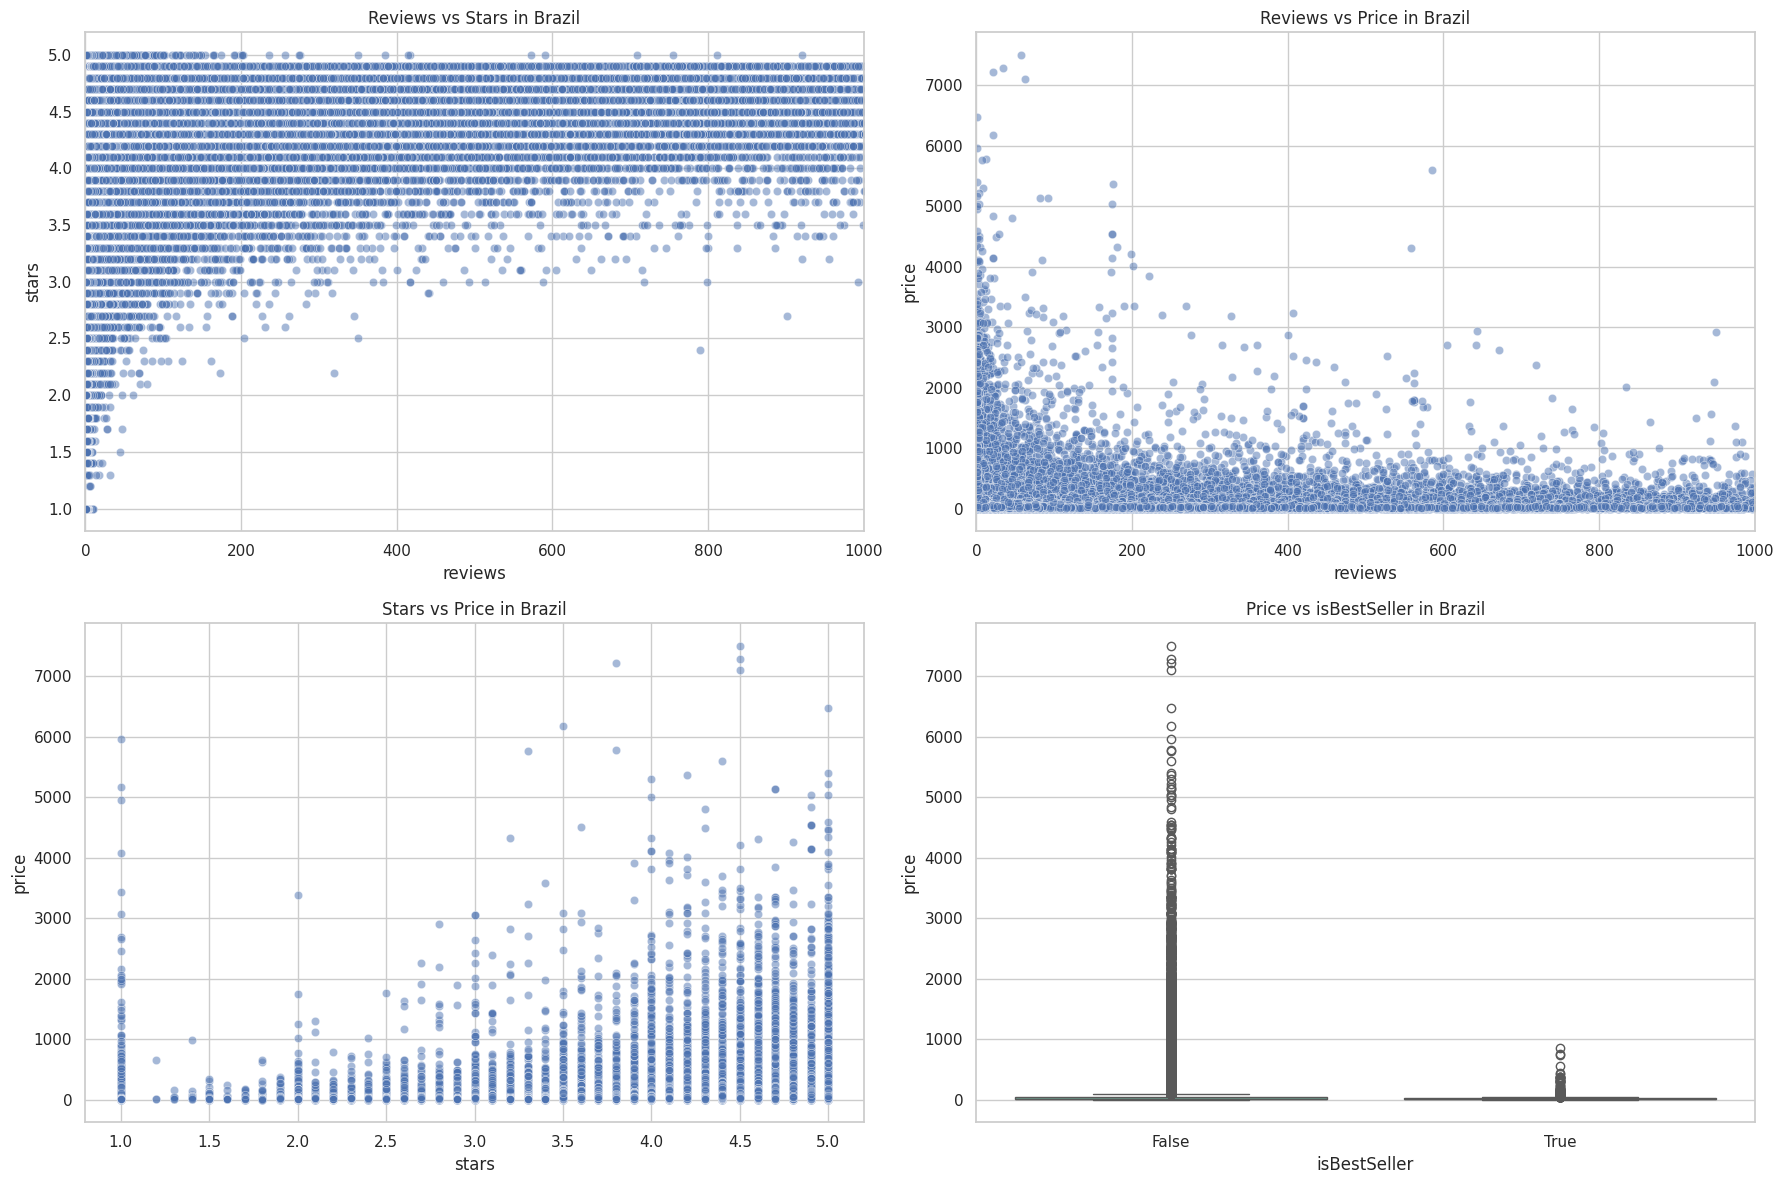

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
sns.scatterplot(data=df1, x='reviews', y='stars', alpha=0.5)
plt.xlim(0, 1000)
plt.title("Reviews vs Stars in Brazil")


plt.subplot(2, 2, 2)
sns.scatterplot(data=df1, x='reviews', y='price', alpha=0.5)
plt.xlim(0, 1000)
plt.title("Reviews vs Price in Brazil")

plt.subplot(2, 2, 3)
sns.scatterplot(data=df1, x='stars', y='price', alpha=0.5)
plt.title("Stars vs Price in Brazil")

plt.subplot(2, 2, 4)
sns.boxplot(data=df1, x='isBestSeller', y='price', palette='Set2')
plt.title("Price vs isBestSeller in Brazil")

plt.tight_layout()
plt.show()

#### **Visualization for UK:**

<ipython-input-26-bba8575d1f39>:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df2, x='isBestSeller', y='price', palette='Set2')


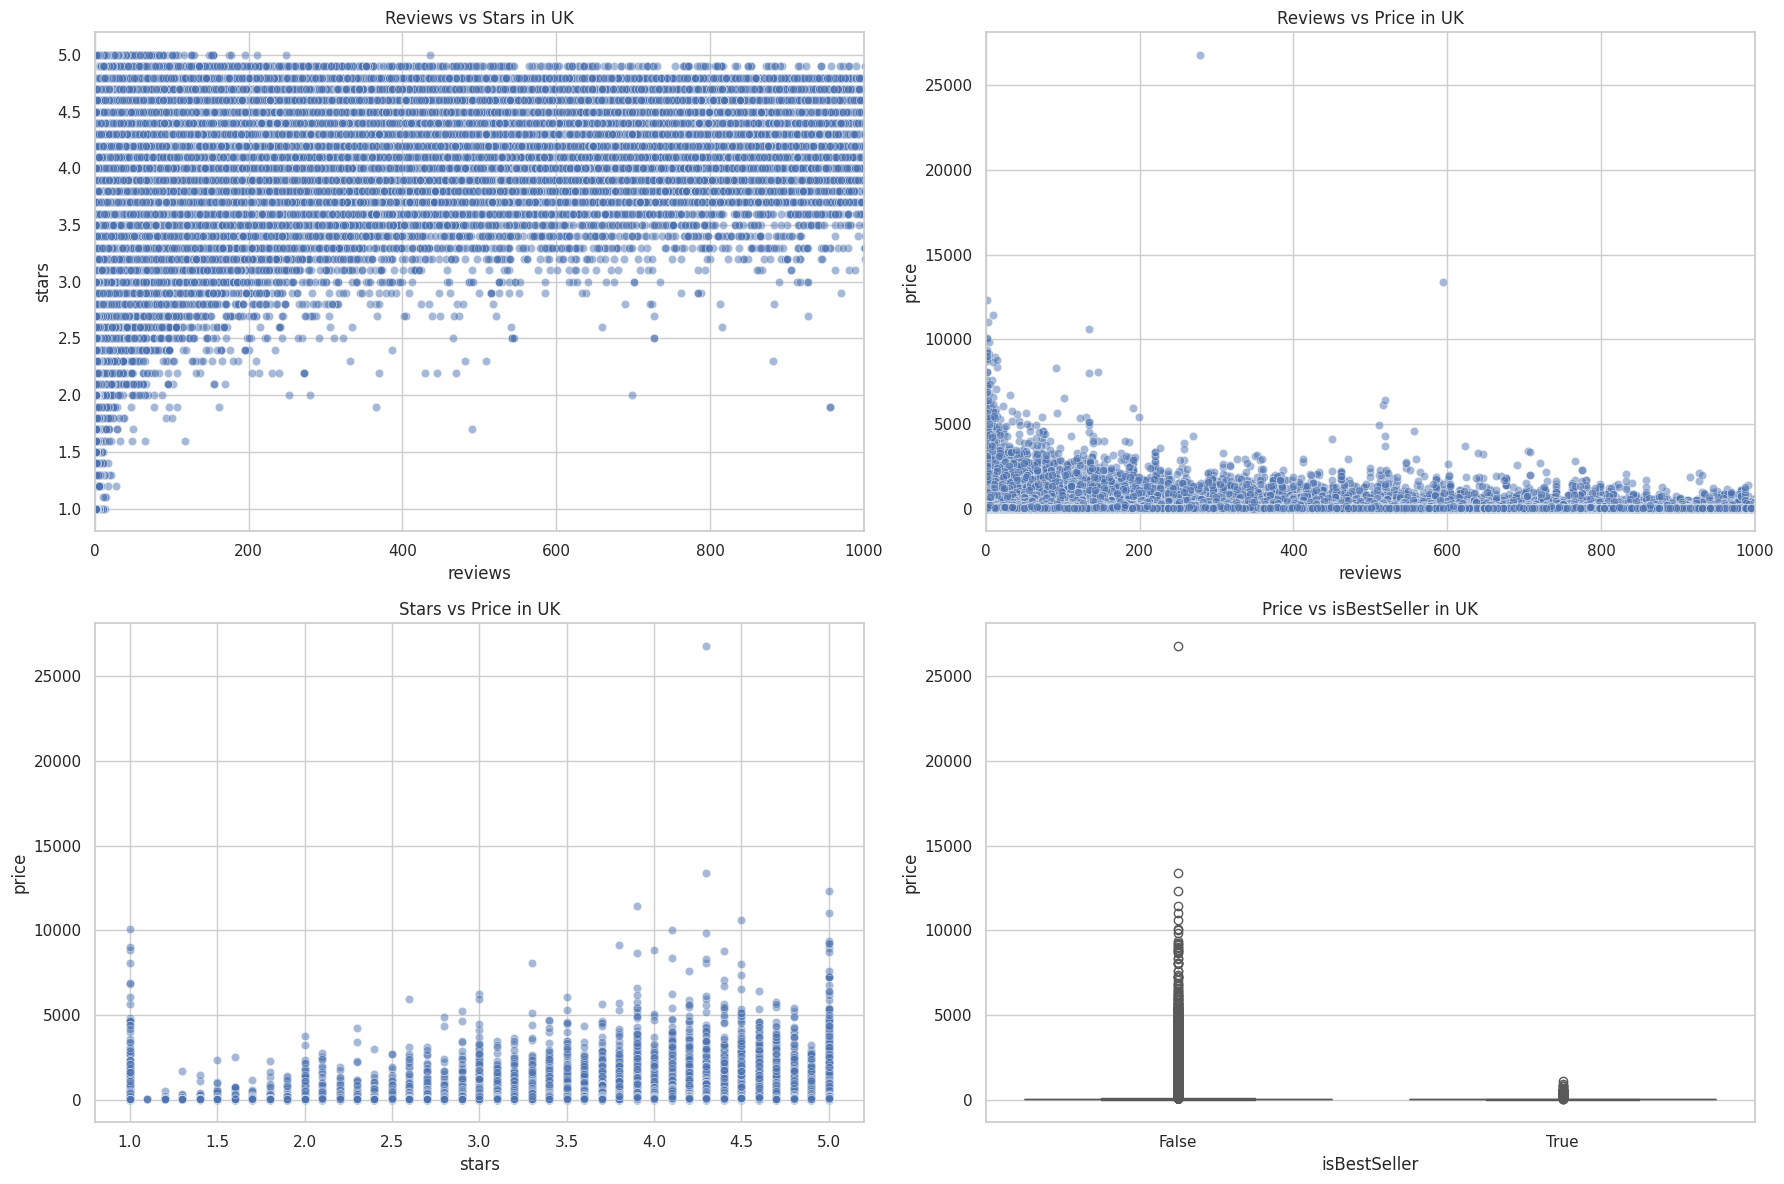

In [ ]:
sns.set(style="whitegrid")

plt.figure(figsize=(18, 12))

plt.subplot(2, 2, 1)
sns.scatterplot(data=df2, x='reviews', y='stars', alpha=0.5)
plt.xlim(0, 1000)
plt.title("Reviews vs Stars in UK")


plt.subplot(2, 2, 2)
sns.scatterplot(data=df2, x='reviews', y='price', alpha=0.5)
plt.xlim(0, 1000)
plt.title("Reviews vs Price in UK")

plt.subplot(2, 2, 3)
sns.scatterplot(data=df2, x='stars', y='price', alpha=0.5)
plt.title("Stars vs Price in UK")

plt.subplot(2, 2, 4)
sns.boxplot(data=df2, x='isBestSeller', y='price', palette='Set2')
plt.title("Price vs isBestSeller in UK")

plt.tight_layout()
plt.show()

### **Findings:**
1, Reviews vs Stars: There seems to be a clustering of star ratings at the higher end, with most ratings being between 4.0 and 5.0. There are more reviews generally associated with higher star ratings, the relationship is not strictly linear.

2, Reviews vs Price: The relationship appears to be nonlinear. Initially, the price seems to decrease as the number of reviews increases, which might indicate that products with fewer reviews tend to be higher-priced items. However, after a certain point, the price levels out despite an increase in reviews.

3, Stars vs Price: There seems to be a positive relationship where higher star ratings are associated with higher prices. However, this relationship may also be nonlinear, as the increase in price appears to slow down for higher star ratings.

4, Price vs isBestSeller: The box plot shows that bestselling products tend to have higher prices, but there’s a significant amount of overlap in price ranges between bestsellers and non-bestsellers.

## 2. Price and Consumer Reviews Analysis





**Analysis Question:**
  1. Do higher priced product have more reviews?

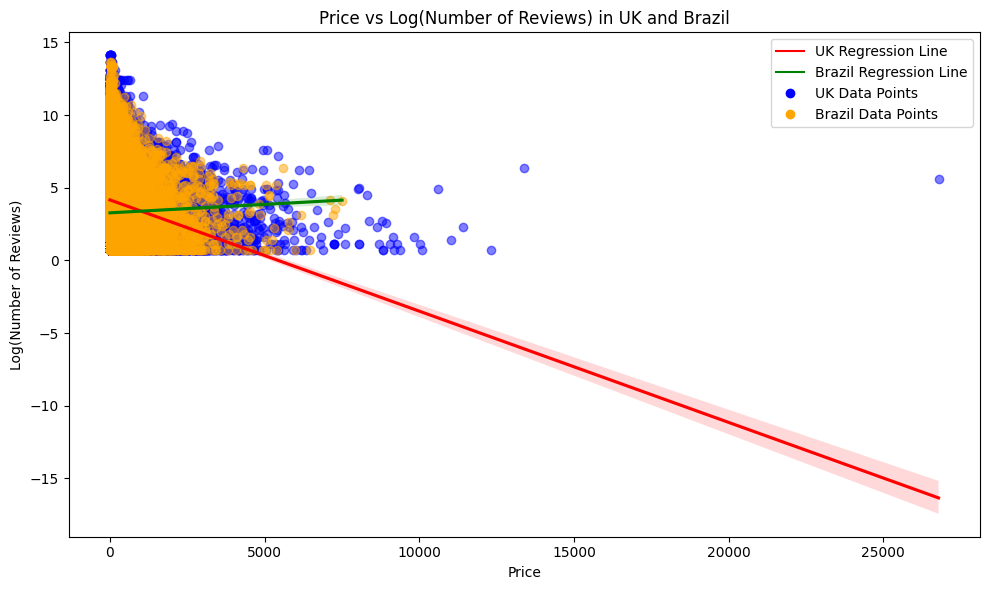

In [ ]:
from scipy.stats import ttest_ind
import matplotlib.lines as mlines

plt.figure(figsize=(10, 6))

dfu['log_reviews'] = np.log(dfu['reviews'] + 1)
dfb['log_reviews'] = np.log(dfb['reviews'] + 1)

sns.regplot(data=dfu, x='price', y='log_reviews', scatter_kws={'alpha':0.5}, line_kws={"color":"red"}, label="UK", color='blue')
sns.regplot(data=dfb, x='price', y='log_reviews', scatter_kws={'alpha':0.5}, line_kws={"color":"green"}, label="Brazil", color='orange')

plt.title('Price vs Log(Number of Reviews) in UK and Brazil')
plt.xlabel('Price')
plt.ylabel('Log(Number of Reviews)')

red_line = mlines.Line2D([], [], color='red', label='UK Regression Line')
green_line = mlines.Line2D([], [], color='green', label='Brazil Regression Line')
blue_dots = mlines.Line2D([], [], color='blue', marker='o', linestyle='None', label='UK Data Points')
orange_dots = mlines.Line2D([], [], color='orange', marker='o', linestyle='None', label='Brazil Data Points')

plt.legend(handles=[red_line, green_line, blue_dots, orange_dots], loc='best')

plt.tight_layout()
plt.show()


### **Findings:**
**UK:**
In the UK, there is a strong negative relationship between price and the number of reviews (log-transformed), indicating that as product prices increase, the number of reviews decreases. This may suggest that UK consumers are more selective or cautious when reviewing higher-priced items, likely purchasing them less frequently. Additionally, higher-priced products in the UK may often be niche or luxury items, bought by a smaller group of consumers who are less inclined to leave reviews.

**Brazil:** In Brazil, while there is still a negative relationship between price and reviews, it is less significant than in the UK. This suggests that although expensive products in Brazil also tend to receive fewer reviews, Brazil consumers may be more likely to engage with reviews, even for higher-priced products.

### **Conclusion:**
The analysis reveals clear differences in review patterns between the UK and Brazil. In both markets, higher-priced products tend to receive fewer reviews, but this trend is more pronounced in the UK. This could imply that UK consumers have access to a wider range of affordable alternatives, making them less likely to review expensive items. In contrast, Brazil consumers, with potentially more limited access to premium products, appear more inclined to leave reviews for such purchases. Cultural factors likely play a role as well, with leaving reviews for high-priced items being more common or valued in some markets than others.

## 3. Cross-National ASIN Analysis (Analysis of differences in the same products between countries using ASIN)



**Analysis Question:**
1. How do products with the same ASIN differ in reviews between Brazil and the UK?
2. How do products with the same ASIN differ in ratings between Brazil and the UK?

### **3.1 Overall Analysis:**

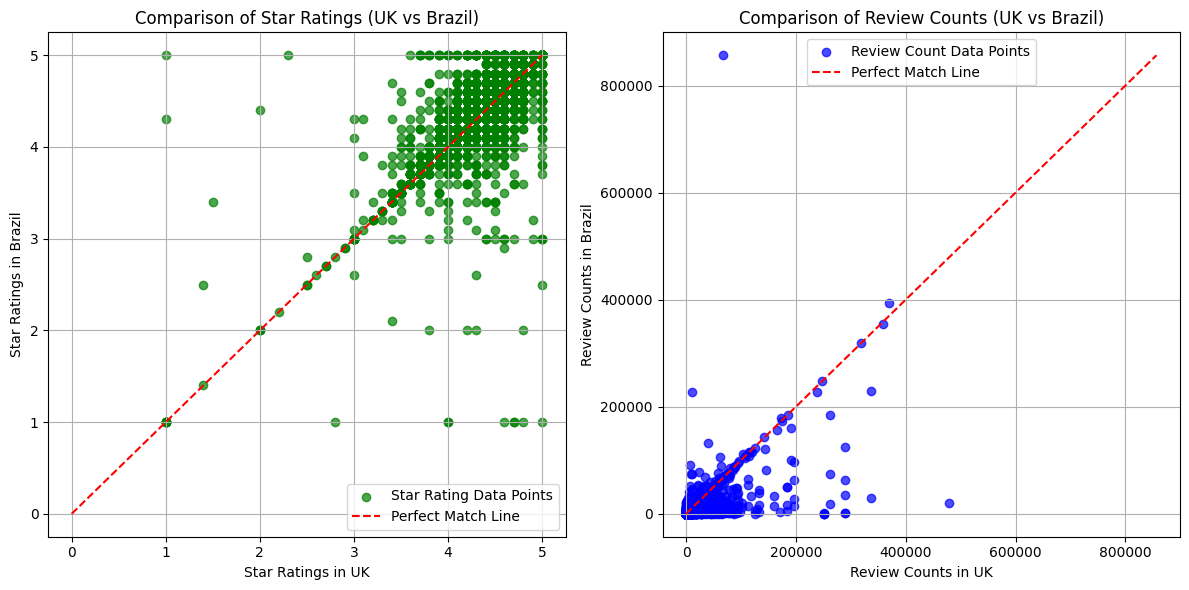

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

merged_df = pd.merge(dfu, dfb, on='asin', suffixes=('_UK', '_BR'))

columns_to_keep = ['asin', 'stars_UK', 'reviews_UK', 'stars_BR', 'reviews_BR']
merged_df = merged_df[columns_to_keep]

plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(merged_df['stars_UK'], merged_df['stars_BR'], alpha=0.7, color='green', label='Star Rating Data Points')
plt.plot([0, max(merged_df['stars_UK'].max(), merged_df['stars_BR'].max())],
         [0, max(merged_df['stars_UK'].max(), merged_df['stars_BR'].max())],
         linestyle='--', color='red', label='Perfect Match Line')
plt.title('Comparison of Star Ratings (UK vs Brazil)')
plt.xlabel('Star Ratings in UK')
plt.ylabel('Star Ratings in Brazil')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.scatter(merged_df['reviews_UK'], merged_df['reviews_BR'], alpha=0.7, color='blue', label='Review Count Data Points')
plt.plot([0, max(merged_df['reviews_UK'].max(), merged_df['reviews_BR'].max())],
         [0, max(merged_df['reviews_UK'].max(), merged_df['reviews_BR'].max())],
         linestyle='--', color='red', label='Perfect Match Line')
plt.title('Comparison of Review Counts (UK vs Brazil)')
plt.xlabel('Review Counts in UK')
plt.ylabel('Review Counts in Brazil')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


### **Findings:**
### 1. Left Plot: Comparison of Star Ratings (UK vs. Brazil)

- **Description**: This scatter plot compares the star ratings of products in the UK (x-axis) with the corresponding products in Brazil (y-axis). Each green dot represents a product with its star ratings in both countries.
- **Analysis**:
  - **Perfect Match Line**: The red dashed line represents a "perfect match," where a product would have the same star rating in both the UK and Brazil. If a point lies on this line, the product has the same rating in both countries.
  - **Distribution**: Most of the data points are clustered in the upper right section of the plot, indicating that many products tend to have high ratings (around 4 to 5 stars) in both countries.
  - **Deviation**: Some points are far from the red line, indicating significant differences in star ratings between the UK and Brazil for certain products. These deviations suggest that consumer preferences or satisfaction levels might differ between the two markets for specific products.

### 2. Right Plot: Comparison of Review Counts (UK vs. Brazil)

- **Description**: This scatter plot compares the number of reviews for products in the UK (x-axis) and Brazil (y-axis). Each blue dot represents a product with its review counts in both countries.
- **Analysis**:
  - **Perfect Match Line**: The red dashed line again represents a "perfect match," where the review count for a product would be the same in both countries.
  - **Distribution**: The majority of the data points are near the bottom-left corner, indicating that many products have relatively low review counts in both the UK and Brazil.
  - **Skewed Distribution**: There are a few products with significantly higher review counts in the UK compared to Brazil, as seen from the points that lie far from the red line toward the x-axis. This suggests that certain products are much more popular or reviewed more extensively in the UK than in Brazil.
  - **Outliers**: There are a few outliers in Brazil with high review counts (closer to 800,000), but they do not match the review numbers in the UK.

### Overall Insights:
- **Star Ratings**: There is a strong tendency for products to have similar ratings between the UK and Brazil, although a few products show notable differences.
- **Review Counts**: Review counts tend to be higher in the UK for many products, with some outliers showing substantial review count differences between the two countries. This might reflect differences in market size, consumer engagement, or product popularity in the respective countries.

This comparison highlights how the same products can perform differently across markets in terms of both customer ratings and engagement (via reviews).


### **3.2 Top 5 products with the largest differences in both review count and star rating & Bottom 5 products with the smallest differences in both review count and star rating:**

In [ ]:
import pandas as pd

merged_df = pd.merge(dfu, dfb, on='asin', suffixes=('_UK', '_BR'))

columns_to_keep = ['asin', 'title_BR', 'title_UK', 'stars_UK', 'reviews_UK', 'stars_BR', 'reviews_BR', 'productURL_UK', 'productURL_BR']
merged_df = merged_df[columns_to_keep]

merged_df = merged_df[(merged_df['reviews_UK'] != 0) & (merged_df['reviews_BR'] != 0) &
                      (merged_df['stars_UK'] != 0) & (merged_df['stars_BR'] != 0)]

merged_df['review_diff'] = (merged_df['reviews_UK'] - merged_df['reviews_BR']).abs()
merged_df['star_diff'] = (merged_df['stars_UK'] - merged_df['stars_BR']).abs()
merged_df['combined_diff'] = merged_df['review_diff'] * merged_df['star_diff']

merged_df = merged_df[merged_df['combined_diff'] != 0]

large_diff_df_sorted = merged_df.sort_values(by='combined_diff', ascending=False).head(5)
small_diff_df_sorted = merged_df.sort_values(by='combined_diff', ascending=True).head(5)

top_5 = large_diff_df_sorted[['title_UK', 'title_BR']]
bottom_5 = small_diff_df_sorted[['title_UK', 'title_BR']]

pd.set_option('display.max_colwidth', None)

print("Top 5 products with the largest differences in both review count and star rating:")
print(top_5)

print("\nBottom 5 products with the smallest differences in both review count and star rating:")
print(bottom_5)

pd.reset_option('display.max_colwidth')


Top 5 products with the largest differences in both review count and star rating:
                                                                                                                                                                                                    title_UK  \
11714  Seagate One Touch Hub, 18 TB, External Hard Drive Desktop HDD – USB-C and USB 3.0 port, for Computer Desktop Workstation PC Laptop Mac, 4 Months Adobe Creative Cloud Photography plan (STLC18000400)   
11633                                                                                                           SanDisk 64 GB SDSQUNS-064G-GN3MA Class 10 Ultra Android MicroSDXC Memory Card and SD Adapter   
11622    Seagate One Touch Hub, 6 TB, External Hard Drive Desktop HDD – USB-C and USB 3.0 port, for Computer Desktop Workstation PC Laptop Mac, 4 Months Adobe Creative Cloud Photography plan (STLC6000400)   
11452                                                                                 

In [ ]:
top_5 = large_diff_df_sorted[['title_UK', 'title_BR', 'stars_UK', 'stars_BR', 'reviews_UK', 'reviews_BR']]
bottom_5 = small_diff_df_sorted[['title_UK', 'title_BR', 'stars_UK', 'stars_BR', 'reviews_UK', 'reviews_BR']]

<ipython-input-12-101b646b6ee1>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_5['title_UK'] = top_5['title_UK'].apply(lambda x: ' '.join(x.split()[:5]))
<ipython-input-12-101b646b6ee1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bottom_5['title_UK'] = bottom_5['title_UK'].apply(lambda x: ' '.join(x.split()[:5]))


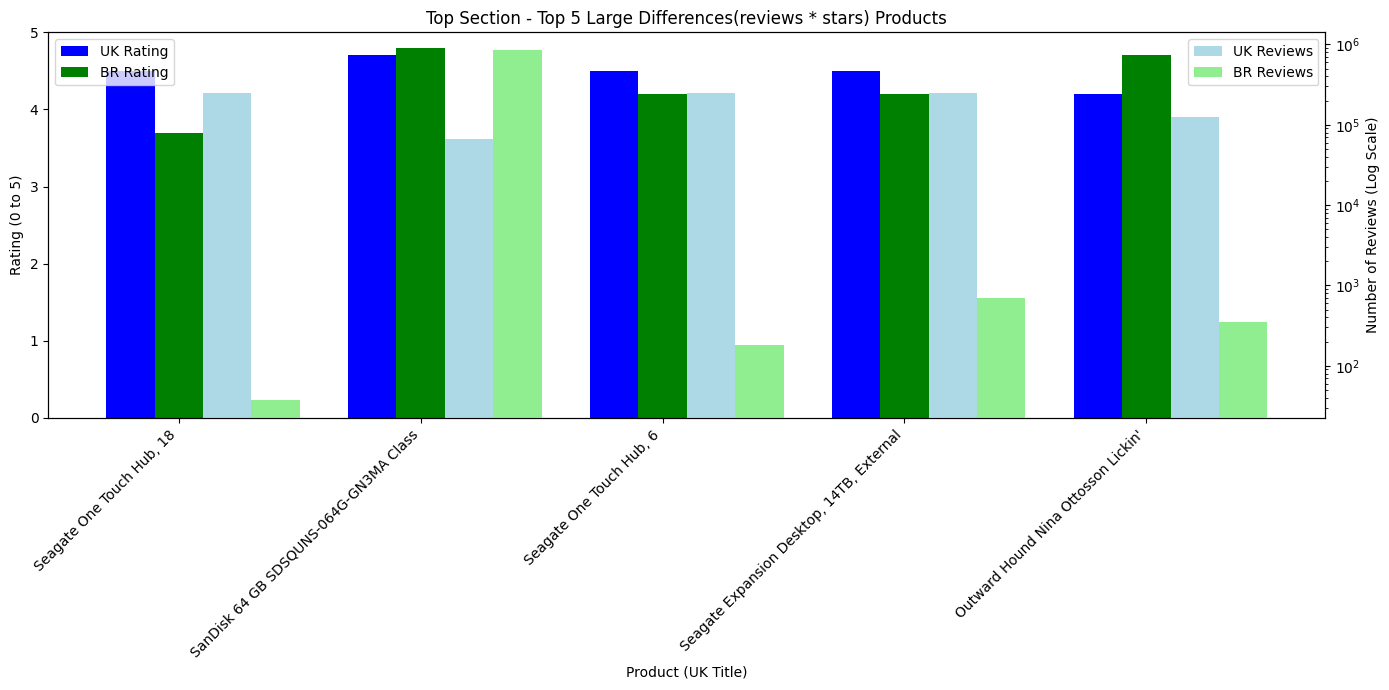

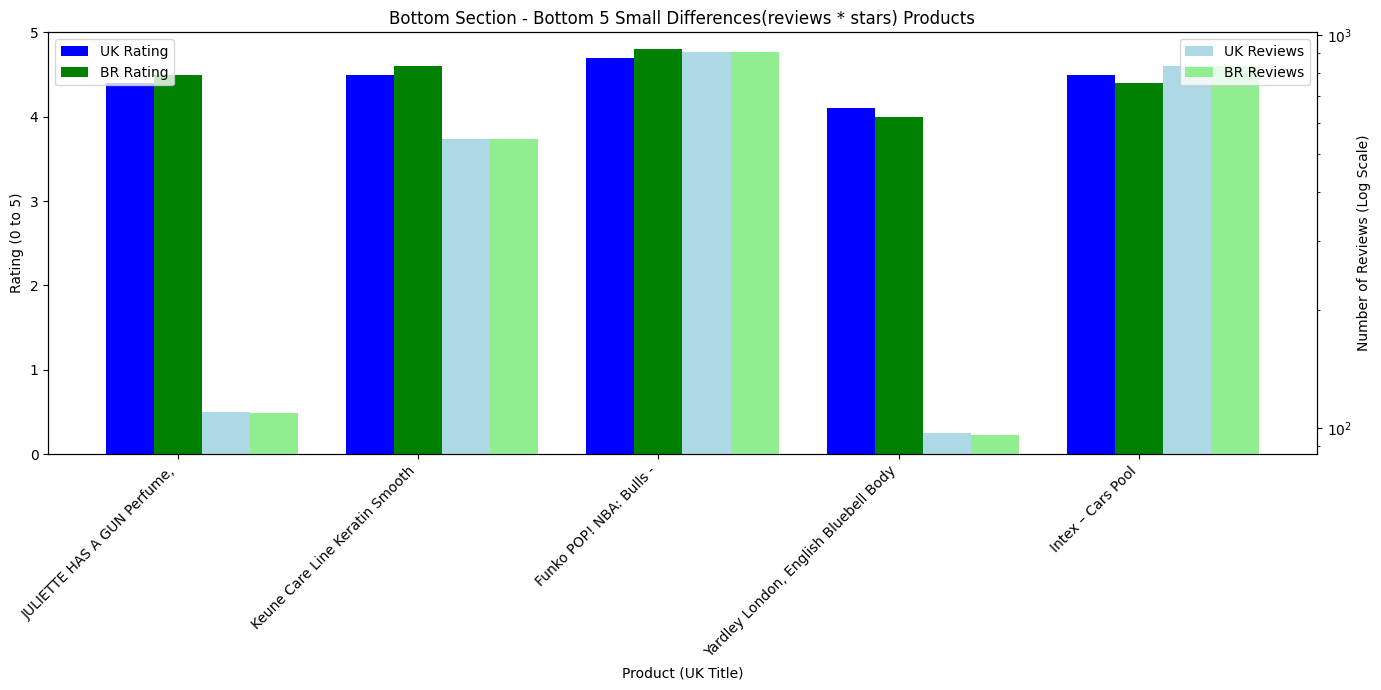

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

top_5['title_UK'] = top_5['title_UK'].apply(lambda x: ' '.join(x.split()[:5]))
bottom_5['title_UK'] = bottom_5['title_UK'].apply(lambda x: ' '.join(x.split()[:5]))

def plot_ratings_reviews_dual_axis_log(data, title, section):
    fig, ax1 = plt.subplots(figsize=(14, 7))

    bar_width = 0.2
    index = np.arange(len(data))

    ax1.bar(index - bar_width, data['stars_UK'], bar_width, label='UK Rating', color='b')
    ax1.bar(index, data['stars_BR'], bar_width, label='BR Rating', color='g')

    ax1.set_xlabel('Product (UK Title)')
    ax1.set_ylabel('Rating (0 to 5)')
    ax1.set_ylim(0, 5)

    ax2 = ax1.twinx()
    ax2.bar(index + bar_width, data['reviews_UK'], bar_width, label='UK Reviews', color='lightblue')
    ax2.bar(index + 2*bar_width, data['reviews_BR'], bar_width, label='BR Reviews', color='lightgreen')

    ax2.set_yscale('log')
    ax2.set_ylabel('Number of Reviews (Log Scale)')

    ax1.set_xticks(index)
    ax1.set_xticklabels(data['title_UK'], rotation=45, ha="right", fontsize=10)

    ax1.set_title(f'{section} - {title}')

    ax1.legend(loc='upper left')
    ax2.legend(loc='upper right')

    plt.tight_layout()
    plt.show()

plot_ratings_reviews_dual_axis_log(top_5, 'Top 5 Large Differences(reviews * stars) Products', 'Top Section')
plot_ratings_reviews_dual_axis_log(bottom_5, 'Bottom 5 Small Differences(reviews * stars) Products', 'Bottom Section')


### **Findings:**


#### Top 5 Products:

These are the products where the difference in both star ratings and review counts between the UK and Brazil is the largest. This could indicate that the product is perceived very differently by consumers in the two countries. For example, it might be very popular in one country but not in the other, or the customer satisfaction (ratings) could vary widely between the regions.

#### Bottom 5 Products:

These are the products where the star ratings and review counts are very similar between the UK and Brazil. This suggests that these products have consistent consumer reception across both markets, with similar levels of engagement (review counts) and satisfaction (ratings) in the two countries.

#### Summary:

The script identifies products that exhibit the most and least discrepancies between the UK and Brazil in terms of customer ratings and engagement. The results will highlight products that are either more successful or polarizing in one market compared to the other.


### **3.3 Top 10% categories with the largest differences in both review count and star rating & Bottom 10% categories with the smallest differences in both review count and star rating:**

In [ ]:
import pandas as pd

merged_df = pd.merge(dfu, dfb, on='asin', suffixes=('_UK', '_BR'))

columns_to_keep = ['asin', 'title_BR', 'title_UK', 'stars_UK', 'reviews_UK', 'stars_BR', 'reviews_BR',
                   'productURL_UK', 'productURL_BR', 'categoryName_UK', 'categoryName_BR']
merged_df = merged_df[columns_to_keep]

merged_df = merged_df[(merged_df['reviews_UK'] != 0) & (merged_df['reviews_BR'] != 0) &
                      (merged_df['stars_UK'] != 0) & (merged_df['stars_BR'] != 0)]

merged_df['review_diff'] = (merged_df['reviews_UK'] - merged_df['reviews_BR']).abs()
merged_df['star_diff'] = (merged_df['stars_UK'] - merged_df['stars_BR']).abs()

merged_df['combined_diff'] = merged_df['review_diff'] * merged_df['star_diff']
merged_df = merged_df[merged_df['combined_diff'] != 0]

percentile_90 = merged_df['combined_diff'].quantile(0.90)
percentile_10 = merged_df['combined_diff'].quantile(0.10)

top_10_percent_df = merged_df[merged_df['combined_diff'] > percentile_90]
bottom_10_percent_df = merged_df[merged_df['combined_diff'] <= percentile_10]

top_10_percent_categories_uk = top_10_percent_df[['categoryName_UK', 'combined_diff']]
bottom_10_percent_categories_uk = bottom_10_percent_df[['categoryName_UK', 'combined_diff']]


print("Top 10% categories with the largest differences:")
print(top_10_percent_categories_uk)

print("\nBottom 10% categories with the smallest differences:")
print(bottom_10_percent_categories_uk)


Top 10% categories with the largest differences:
                       categoryName_UK  combined_diff
0                       Hi-Fi Speakers          757.2
23                      Hi-Fi Speakers          643.4
29                      Hi-Fi Speakers          834.1
43                      Hi-Fi Speakers          735.4
64                 Wearable Technology         3082.7
...                                ...            ...
12567  Binoculars, Telescopes & Optics         9628.6
12575  Binoculars, Telescopes & Optics         4393.2
12728              Wearable Technology         4597.2
12739              Wearable Technology         1512.2
12862    Mobile Phones & Communication         1719.6

[574 rows x 2 columns]

Bottom 10% categories with the smallest differences:
                   categoryName_UK  combined_diff
131    Storage & Home Organisation            0.3
144    Storage & Home Organisation            0.2
234          PC Gaming Accessories            0.1
268          PC Gaming Ac

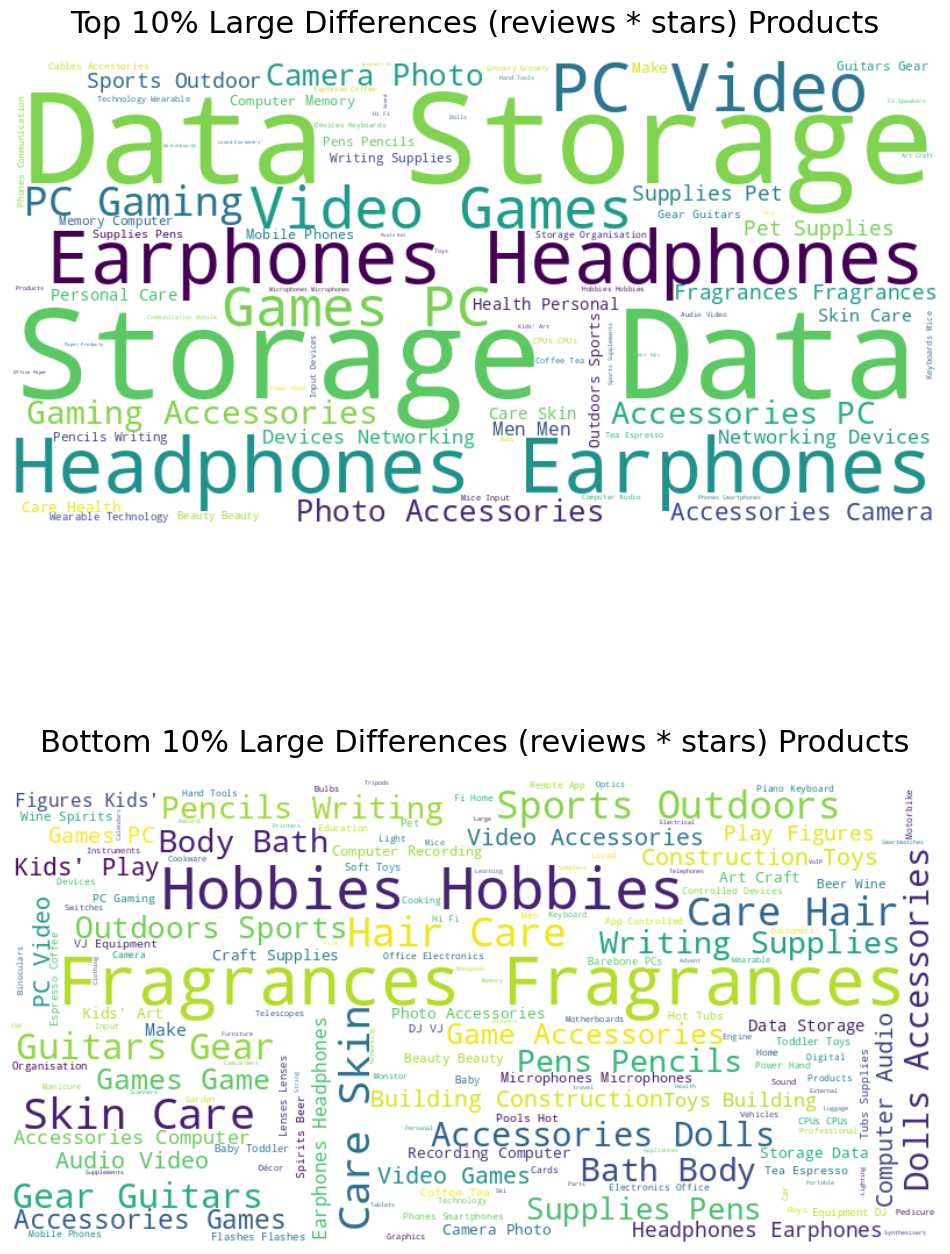

In [ ]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

all_categories_uk_top = ' '.join(top_10_percent_categories_uk['categoryName_UK'].tolist())
all_categories_uk_bottom = ' '.join(bottom_10_percent_categories_uk['categoryName_UK'].tolist())

def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(12, 8))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=22, pad=20)
    plt.axis('off')

fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))

wordcloud_top = WordCloud(width=800, height=400, background_color='white').generate(all_categories_uk_top)
wordcloud_bottom = WordCloud(width=800, height=400, background_color='white').generate(all_categories_uk_bottom)

ax1.imshow(wordcloud_top, interpolation='bilinear')
ax1.set_title("Top 10% Large Differences (reviews * stars) Products", fontsize=22, pad=20)
ax1.axis('off')

ax2.imshow(wordcloud_bottom, interpolation='bilinear')
ax2.set_title("Bottom 10% Large Differences (reviews * stars) Products", fontsize=22, pad=20)
ax2.axis('off')

plt.subplots_adjust(hspace=0.4)
plt.show()


### **Findings:**

#### Top 10% Categories with the Largest Differences:

These are the product categories that show the greatest differences in both star ratings and review counts between the UK and Brazil. A large combined difference indicates that products in these categories have very different consumer reception between the two countries. For example, customers in one country may rate and review products in these categories much more positively (or negatively) than in the other country, suggesting divergent preferences or satisfaction levels.

#### Bottom 10% Categories with the Smallest Differences:

These are the product categories where the differences in both star ratings and review counts between the UK and Brazil are the smallest. This suggests that products in these categories receive consistent feedback and engagement in both countries. Consumers in the UK and Brazil perceive these products similarly, with minimal variation in terms of customer satisfaction (ratings) and engagement (review counts).

#### Summary:

The analysis identifies product categories where the consumer experience differs the most and the least between the UK and Brazil. Categories in the top 10% represent the areas with the most variation in customer feedback, potentially highlighting differing market trends or product performance across regions. Meanwhile, categories in the bottom 10% reflect a more unified global reception, where products perform consistently in both markets.


### **3.4 Applied OpenAI API (GPT-4o)**

In [ ]:
pip install openai==0.28

In [ ]:
import openai

openai.api_key = ""

In [ ]:
import openai
import pandas as pd

def summarize_categories(categories):
    category_text = ', '.join(categories)

    prompt = f"Here are some product categories: {category_text}. Please summarize them in one sentence or extract key themes or patterns."

    response = openai.ChatCompletion.create(
      model="gpt-4o",
      messages=[
          {"role": "system", "content": "You are a helpful assistant."},
          {"role": "user", "content": prompt}
      ],
      max_tokens=1000,
      temperature=0.7
    )

    return response['choices'][0]['message']['content'].strip()

categories_uk_top = top_10_percent_categories_uk['categoryName_UK'].tolist()
categories_uk_bottom = bottom_10_percent_categories_uk['categoryName_UK'].tolist()

uk_summary_top = summarize_categories(categories_uk_top)
uk_summary_bottom = summarize_categories(categories_uk_bottom)

print("Category Summary (Top 10%):")
print(uk_summary_top)

print("\nCategory Summary (Bottom 10%):")
print(uk_summary_bottom)


Category Summary (Top 10%):
The product categories span a wide range of themes, including technology (such as Hi-Fi speakers, wearable technology, and mobile phones), gaming accessories, beauty and personal care, sports and outdoor items, audio and video equipment, data storage, home and office supplies, toys, and food and beverages, indicating a diverse selection of consumer goods.

Category Summary (Bottom 10%):
The product categories encompass a wide range of items, including electronics (such as PC accessories, mobile phones, cameras, and audio equipment), home and personal care (like fragrances, skin care, and bath products), hobbies and toys (including building toys, musical instruments, and art supplies), outdoor and sports equipment, automotive products, and various household essentials (such as storage solutions, furniture, and kitchenware), indicating a diverse market catering to technology, leisure, and everyday needs.


### Interpretation of Results:

**Top 10% Category Summary:**  
The top 10% of categories include a wide range of product themes such as technology (Hi-Fi speakers, wearable technology, mobile phones), gaming accessories, beauty and personal care, sports and outdoor items, audio and video equipment, data storage devices, home and office supplies, toys, and food and beverages. This reflects a diverse selection of consumer goods, suggesting that significant differences in consumer engagement and satisfaction between the UK and Brazil may appear across these categories.

**Bottom 10% Category Summary:**  
The bottom 10% of categories consist of electronics (PC accessories, mobile phones, cameras, audio equipment), home and personal care products (fragrances, skincare, bath products), hobbies and toys (building toys, musical instruments, art supplies), outdoor and sports equipment, automotive products, and various household essentials (such as storage solutions, furniture, kitchenware). These categories indicate a diverse market serving consumer needs related to technology, leisure, and everyday essentials, with similar consumer feedback in both regions.

**Summary:**  
The AI-driven category analysis identifies the top 10% categories where consumer perception between the UK and Brazil shows the most significant differences, and the bottom 10% categories where the differences are minimal. The top 10% categories represent diverse consumer goods with varied regional responses, while the bottom 10% categories consist of products with more uniform reception across both markets. This analysis can provide valuable insights for developing region-specific marketing strategies or global marketing approaches.


## 4. Category Analysis




### **Top 10 category bestseller**

**Analysis problem:**

Which category has the most best sellers and best sellers rate in Brazil and UK?

<ipython-input-30-8e5e1d53cb45>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='categoryName', x='bestSellerCount', data=best_seller_count.head(10), palette='viridis')


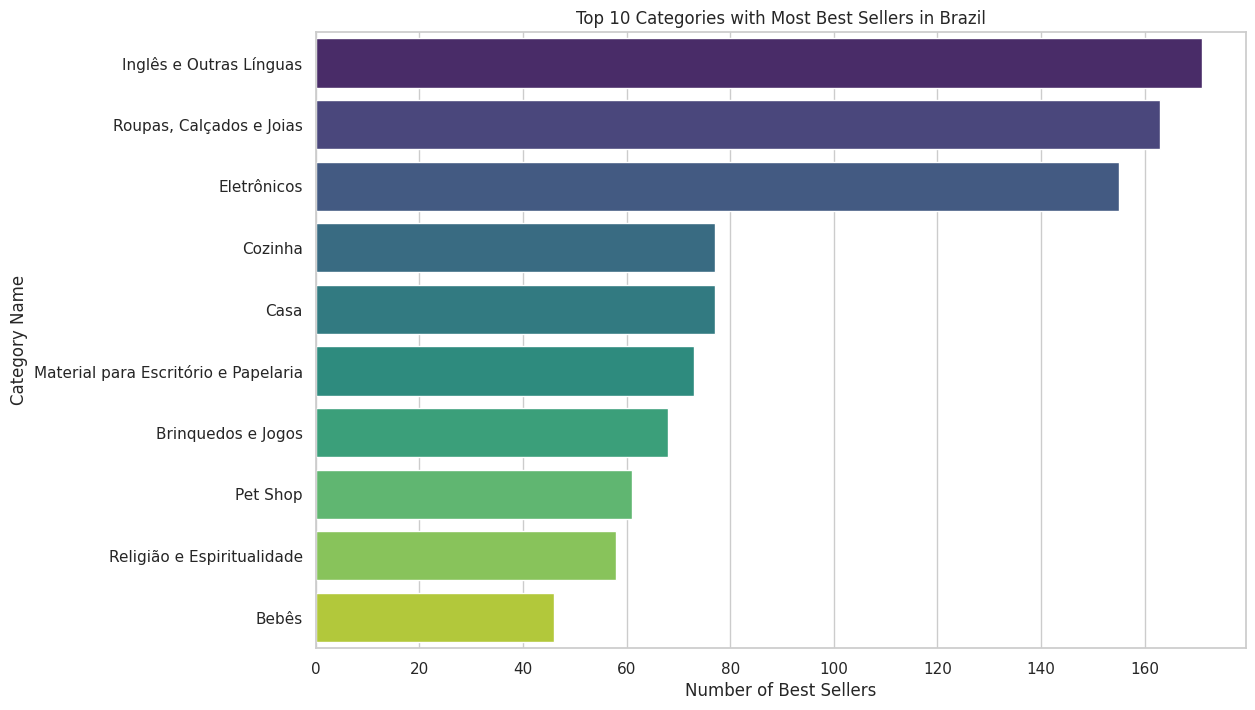

In [ ]:
best_seller_count = df1[df1['isBestSeller'] == True].groupby('categoryName')['isBestSeller'].count().reset_index()
best_seller_count = best_seller_count.rename(columns={'isBestSeller': 'bestSellerCount'})

best_seller_count = best_seller_count.sort_values(by='bestSellerCount', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(y='categoryName', x='bestSellerCount', data=best_seller_count.head(10), palette='viridis')
plt.title('Top 10 Categories with Most Best Sellers in Brazil')
plt.xlabel('Number of Best Sellers')
plt.ylabel('Category Name')
plt.show()

<ipython-input-31-04159c6aea57>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='categoryName', x='bestSellerRate', data=best_seller_rate.head(10), palette='RdYlBu')


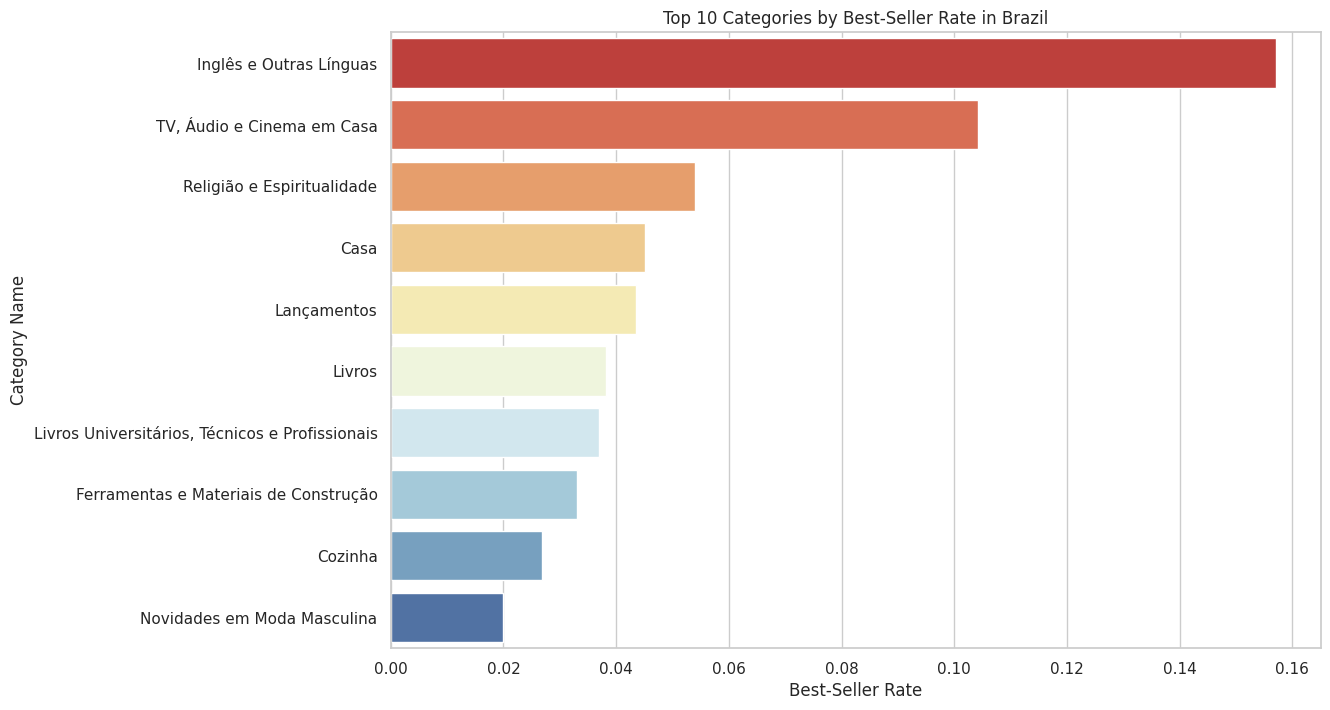

In [ ]:
total_products_per_category = df1.groupby('categoryName')['isBestSeller'].count().reset_index()
total_products_per_category = total_products_per_category.rename(columns={'isBestSeller': 'totalProducts'})

best_seller_rate = pd.merge(best_seller_count, total_products_per_category, on='categoryName')

best_seller_rate['bestSellerRate'] = best_seller_rate['bestSellerCount'] / best_seller_rate['totalProducts']

best_seller_rate = best_seller_rate.sort_values(by='bestSellerRate', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(y='categoryName', x='bestSellerRate', data=best_seller_rate.head(10), palette='RdYlBu')
plt.title('Top 10 Categories by Best-Seller Rate in Brazil')
plt.xlabel('Best-Seller Rate')
plt.ylabel('Category Name')
plt.show()

<ipython-input-28-2893e7499160>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='categoryName', x='bestSellerCount', data=best_seller_count.head(10), palette='viridis')


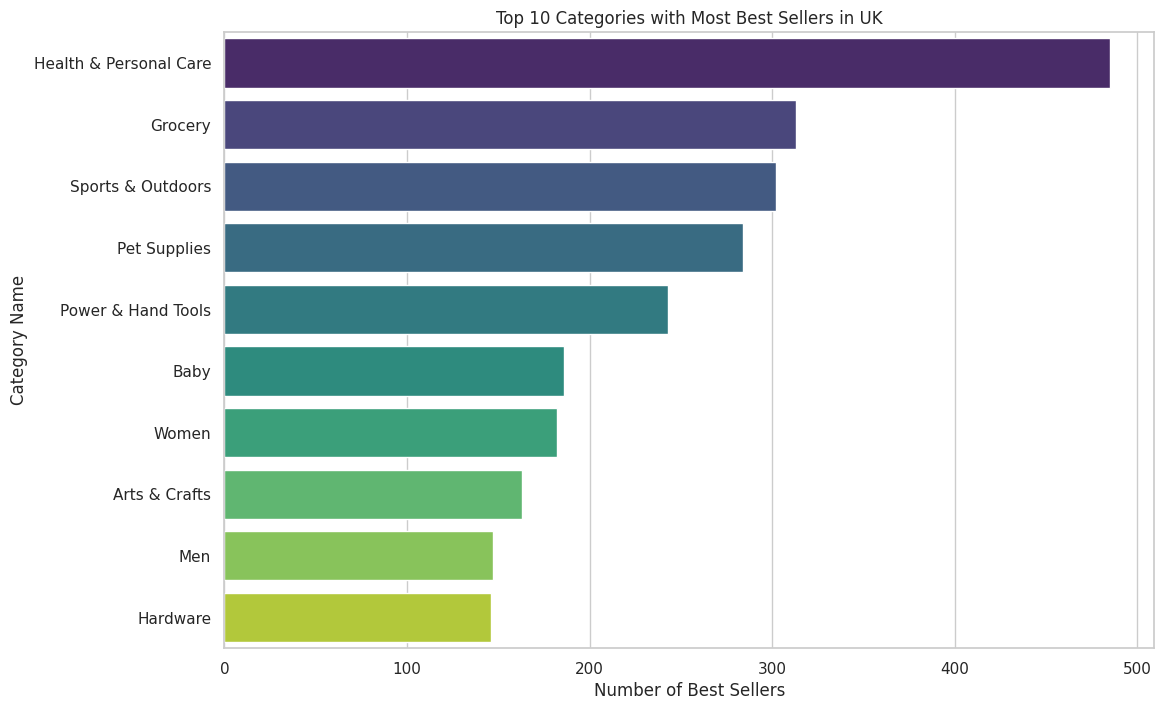

In [ ]:
best_seller_count = df2[df2['isBestSeller'] == True].groupby('categoryName')['isBestSeller'].count().reset_index()
best_seller_count = best_seller_count.rename(columns={'isBestSeller': 'bestSellerCount'})

best_seller_count = best_seller_count.sort_values(by='bestSellerCount', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(y='categoryName', x='bestSellerCount', data=best_seller_count.head(10), palette='viridis')
plt.title('Top 10 Categories with Most Best Sellers in UK')
plt.xlabel('Number of Best Sellers')
plt.ylabel('Category Name')
plt.show()

<ipython-input-29-3fc91a0a84d8>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y='categoryName', x='bestSellerRate', data=best_seller_rate.head(10), palette='RdYlBu')


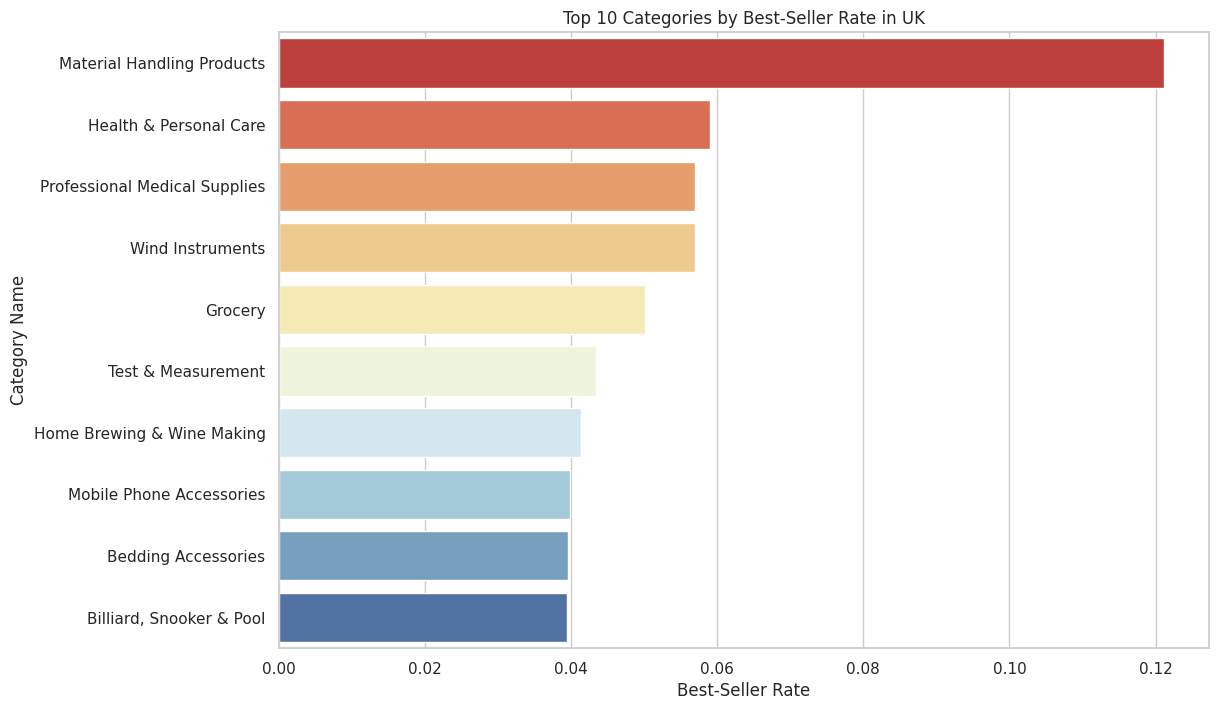

In [ ]:
total_products_per_category = df2.groupby('categoryName')['isBestSeller'].count().reset_index()
total_products_per_category = total_products_per_category.rename(columns={'isBestSeller': 'totalProducts'})

best_seller_rate = pd.merge(best_seller_count, total_products_per_category, on='categoryName')

best_seller_rate['bestSellerRate'] = best_seller_rate['bestSellerCount'] / best_seller_rate['totalProducts']

best_seller_rate = best_seller_rate.sort_values(by='bestSellerRate', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(y='categoryName', x='bestSellerRate', data=best_seller_rate.head(10), palette='RdYlBu')
plt.title('Top 10 Categories by Best-Seller Rate in UK')
plt.xlabel('Best-Seller Rate')
plt.ylabel('Category Name')
plt.show()

**UK Market:**

•	Material Handling Products lead the UK market with the highest best-seller rate. This suggests that this category has fewer products overall but a high conversion into best sellers. This may reflect high demand for **specialized equipment or tools**.

•	Health & Personal Care ranks highly in both the number of best sellers and best-seller rate, showing strong consumer interest in **health and wellness**.

•	Professional Medical Supplies and Wind Instruments also have notable best-seller rates, which could indicate niche markets with dedicated consumer bases.

•	Grocery and Mobile Phone Accessories have a relatively moderate best-seller rate, reflecting steady demand across **households and tech-savvy consumers**.

•	Billiard, Snooker & Pool categories appear in the list, suggesting the popularity of recreational items in this market.

**Brazil Market:**

•	English and Other Languages ranks highest in both the best-seller rate and the number of best sellers. This indicates a strong demand for **language learning products**, particularly English, which is seen as essential for professional growth in Brazil.

•	Clothing, Footwear, and Jewelry is another high-performing category by the number of best sellers. Brazilian consumers **value fashion**, which is a significant sector in their market.

•	Electronics also rank high, with a strong focus on tech products that are integral to daily life in Brazil, reflecting their increasing digital penetration.

•	Categories like TV, Audio, and Home Cinema show a high best-seller rate, highlighting Brazilians’ interest in home entertainment systems.

•	Religion & Spirituality ranks significantly in both metrics, reflecting Brazil’s strong religious culture, where spiritual products are consistently in demand.

**Key insights:**

1.**Specialized Markets in the UK:** Categories like Material Handling Products and Professional Medical Supplies have higher best-seller rates, suggesting they cater to more niche markets where demand is specific and concentrated. Health products also continue to be a top priority for UK consumers.

2.**Education and Technology in Brazil:** The high demand for English and Other Languages products in Brazil suggests a strong focus on self-improvement and education. The dominance of Electronics and Home Entertainment shows the importance of technology and digital devices, which are essential in the daily lives of Brazilian consumers.

3.**Cultural Preferences:** In Brazil, Religion & Spirituality stands out, indicating the ongoing importance of religious products. In the UK, Health & Personal Care reflects the health-conscious culture, where consumers continue to invest in wellness and personal care.

**General Conclusion:**

•	The UK market is driven by health, specialized tools, and recreational products. This aligns with a health-conscious and tech-savvy consumer base.

•	Brazil is driven by educational needs, electronics, and fashion, reflecting a culture focused on professional growth, digital inclusion, and religious traditions.


This analysis highlights how consumer preferences and market demand differ in the two regions. The UK focuses more on personal care and household supplies, whereas Brazil has a stronger demand for educational materials and electronics.

## 5. Google Trends Analysis

#### **UK:**

In [ ]:
best_sellers = df_uk[df_uk['isBestSeller'] == True]
non_best_sellers = df_uk[df_uk['isBestSeller'] == False]

print("Average rating for best sellers:", best_sellers['stars'].mean())
print("Average rating for non-best sellers:", non_best_sellers['stars'].mean())
print("Average price for best sellers:", best_sellers['price'].mean())
print("Average price for non-best sellers:", non_best_sellers['price'].mean())


Average rating for best sellers: 4.424950033311126
Average rating for non-best sellers: 4.307468003453901
Average price for best sellers: 31.319074117255166
Average price for non-best sellers: 62.81534107512234


In [ ]:
category_analysis = df_uk.groupby('categoryName').agg({'price': 'mean', 'stars': 'mean', 'reviews': 'sum'}).reset_index()

print(category_analysis)


                       categoryName       price     stars   reviews
0                       3D Printers  602.842030  4.071429     64496
1            3D Printing & Scanning  260.576529  4.199038     94393
2     Abrasive & Finishing Products   20.661540  4.407265    107216
3                    Action Cameras  214.360120  3.796414    128658
4                          Adapters   11.493403  4.329583   1742886
..                              ...         ...       ...       ...
291                Wind Instruments   76.596143  4.118699     83244
292               Window Treatments   28.221412  4.363556    543492
293                           Women   29.430659  4.228871  20204185
294  Women's Sports & Outdoor Shoes   96.546348  4.311689   1925549
295     eBook Readers & Accessories  116.071048  4.341667    161009

[296 rows x 4 columns]


In [ ]:
import pandas as pd


best_sellers = df_uk[df_uk['isBestSeller'] == True]

category_best_seller_count = best_sellers.groupby('categoryName')['asin'].count().reset_index()

category_best_seller_count_sorted = category_best_seller_count.sort_values(by='asin', ascending=False)

top_5_best_seller_categories = category_best_seller_count_sorted.head(5)
print("Top 5 Best-Seller Categories:")
print(top_5_best_seller_categories)


Top 5 Best-Seller Categories:
               categoryName  asin
101  Health & Personal Care   485
84                  Grocery   313
212       Sports & Outdoors   302
182            Pet Supplies   284
188      Power & Hand Tools   243


In [ ]:
import pandas as pd

GT_uk = pd.read_csv('/content/drive/MyDrive/Amz/GoogleTrends.csv')
print(GT_uk.head())


  Category: All categories                 Unnamed: 1  \
0                      NaN                        NaN   
1                     Week  Grocery: (United Kingdom)   
2                 1/1/2023                          2   
3                 1/8/2023                          2   
4                1/15/2023                          2   

                        Unnamed: 2                Unnamed: 3  \
0                              NaN                       NaN   
1  Personal Care: (United Kingdom)  Sports: (United Kingdom)   
2                               <1                        80   
3                               <1                        74   
4                               <1                        78   

                Unnamed: 4             Unnamed: 5  
0                      NaN                    NaN  
1  Tools: (United Kingdom)  Pet: (United Kingdom)  
2                        9                     19  
3                       10                     18  
4           

In [ ]:
import pandas as pd

GT_uk = pd.read_csv('/content/drive/MyDrive/Amz/GoogleTrends.csv', skiprows=2)

GT_uk.columns = ['Date', 'Grocery', 'Personal Care', 'Sports', 'Tools', 'Pet']

print(GT_uk.head())

GT_uk['Date'] = pd.to_datetime(GT_uk['Date'], errors='coerce')

print(GT_uk.info())


        Date  Grocery Personal Care  Sports  Tools  Pet
0   1/1/2023        2            <1      80      9   19
1   1/8/2023        2            <1      74     10   18
2  1/15/2023        2            <1      78     10   17
3  1/22/2023        2            <1      77     10   18
4  1/29/2023        2            <1      80     11   18
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53 entries, 0 to 52
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Date           53 non-null     datetime64[ns]
 1   Grocery        53 non-null     int64         
 2   Personal Care  53 non-null     object        
 3   Sports         53 non-null     int64         
 4   Tools          53 non-null     int64         
 5   Pet            53 non-null     int64         
dtypes: datetime64[ns](1), int64(4), object(1)
memory usage: 2.6+ KB
None


In [ ]:
import pandas as pd

GT_uk['Personal Care'] = GT_uk['Personal Care'].replace('<1', '0.5').astype(float)

print(GT_uk.dtypes)
print(GT_uk.head())


Date             datetime64[ns]
Grocery                   int64
Personal Care           float64
Sports                    int64
Tools                     int64
Pet                       int64
dtype: object
        Date  Grocery  Personal Care  Sports  Tools  Pet
0 2023-01-01        2            0.5      80      9   19
1 2023-01-08        2            0.5      74     10   18
2 2023-01-15        2            0.5      78     10   17
3 2023-01-22        2            0.5      77     10   18
4 2023-01-29        2            0.5      80     11   18


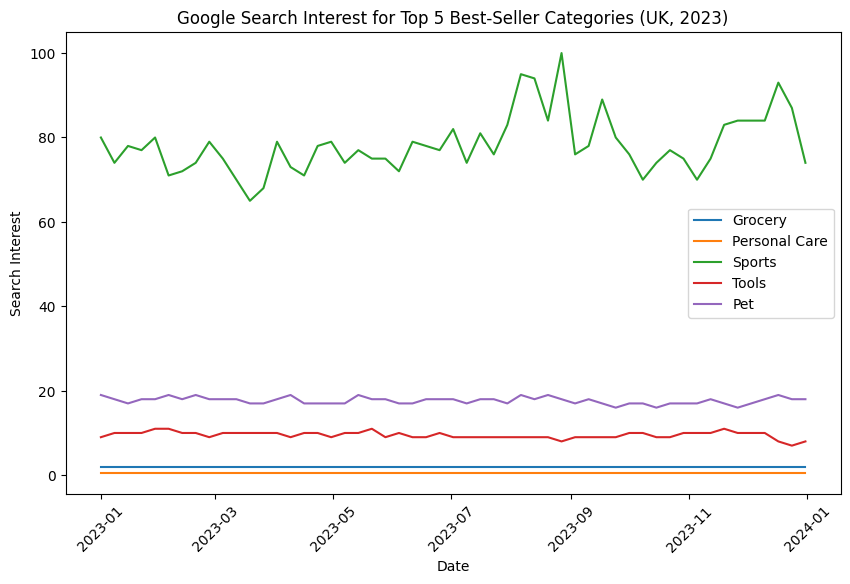

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(GT_uk['Date'], GT_uk['Grocery'], label='Grocery')
plt.plot(GT_uk['Date'], GT_uk['Personal Care'], label='Personal Care')
plt.plot(GT_uk['Date'], GT_uk['Sports'], label='Sports')
plt.plot(GT_uk['Date'], GT_uk['Tools'], label='Tools')
plt.plot(GT_uk['Date'], GT_uk['Pet'], label='Pet')

plt.title('Google Search Interest for Top 5 Best-Seller Categories (UK, 2023)')
plt.xlabel('Date')
plt.ylabel('Search Interest')
plt.legend()
plt.xticks(rotation=45)
plt.show()


In [ ]:
category_avg_search_interest = GT_uk[['Grocery', 'Personal Care', 'Sports', 'Tools', 'Pet']].mean()

for category, avg_interest in category_avg_search_interest.items():
    print(f"Average search interest for {category}: {avg_interest}")


Average search interest for Grocery: 2.0
Average search interest for Personal Care: 0.5
Average search interest for Sports: 78.26415094339623
Average search interest for Tools: 9.50943396226415
Average search interest for Pet: 17.660377358490567


In [ ]:
category_avg_price = best_sellers.groupby('categoryName')['price'].mean().reset_index()

top_5_categories = ['Health & Personal Care', 'Grocery', 'Sports & Outdoors', 'Pet Supplies', 'Power & Hand Tools']
category_avg_price_top_5 = category_avg_price[category_avg_price['categoryName'].isin(top_5_categories)]

print(category_avg_price_top_5)



               categoryName      price
84                  Grocery  13.416097
101  Health & Personal Care  18.099781
182            Pet Supplies  19.905889
188      Power & Hand Tools  25.546356
212       Sports & Outdoors  43.446705


In [ ]:
import pandas as pd

data = {
    'Category': ['Grocery', 'Health & Personal Care', 'Pet Supplies', 'Power & Hand Tools', 'Sports & Outdoors'],
    'Average Price (£)': [13.42, 18.10, 19.91, 25.55, 43.45],
    'Average Search Interest': [2.0, 0.5, 17.66, 9.51, 78.26]
}

df_combined = pd.DataFrame(data)

print(df_combined)


                 Category  Average Price (£)  Average Search Interest
0                 Grocery              13.42                     2.00
1  Health & Personal Care              18.10                     0.50
2            Pet Supplies              19.91                    17.66
3      Power & Hand Tools              25.55                     9.51
4       Sports & Outdoors              43.45                    78.26


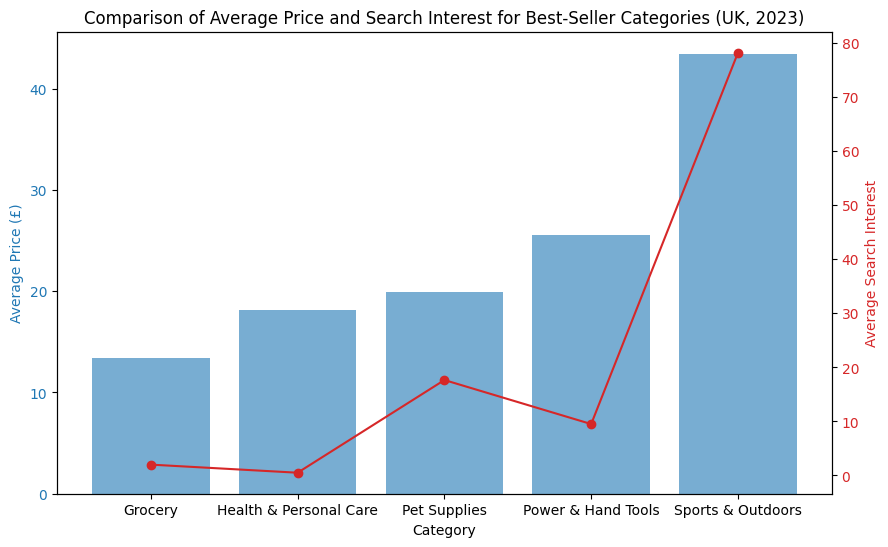

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Category')
ax1.set_ylabel('Average Price (£)', color='tab:blue')
ax1.bar(df_combined['Category'], df_combined['Average Price (£)'], color='tab:blue', alpha=0.6, label='Average Price')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Average Search Interest', color='tab:red')
ax2.plot(df_combined['Category'], df_combined['Average Search Interest'], color='tab:red', marker='o', label='Search Interest')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.title('Comparison of Average Price and Search Interest for Best-Seller Categories (UK, 2023)')
plt.show()


This chart shows that categories like Sports & Outdoors have high search interest despite higher prices, while categories with lower search interest, like Grocery and Health & Personal Care, are still best-sellers due to affordability.

**Conclusion**

Lower-priced categories (like Grocery and Health & Personal Care) achieve best-seller status even with low search interest, supporting the hypothesis that affordability plays a key role.

Higher-priced categories (like Sports & Outdoors) can also achieve best-seller status, but this is driven by high search interest.

This graph shows that some categories, like Grocery and Health & Personal Care, have significantly lower prices than others, supporting the idea that affordability drives best-seller status.



Affordability is a critical factor for best-seller status in these categories, suggesting that consumers are more likely to purchase these products based on price alone, rather than popularity (low search interest).

#### **Brazil**

In [ ]:
import pandas as pd

file_path = '/content/drive/MyDrive/Amz/Copy of processed_amz_br.csv'

df_b = pd.read_csv(file_path)

df_b.head()


asin                                              title  \
0  B0C154VR2L  SAMSUNG Smart TV Crystal 50" 4K UHD CU7700 - A...   
1  B0C85J5HYD  Mini Projetor Portatil 5G Wifi 6 Bluetooth 5.0...   
2  B0C1538ZJ4  Samsung Smart TV Crystal 43" 4K UHD CU7700 - A...   
3  B0B4V379PC  Samsung 60BU8000 - Smart TV LED 60' 4K UHD, Wi...   
4  B0899BRB4B        Smart TV LED 32'' HD Samsung LH32BETBLGGXZD   

                                productURL  stars  reviews     price  \
0  https://www.amazon.com.br/dp/B0C154VR2L    4.6      269  410.2290   
1  https://www.amazon.com.br/dp/B0C85J5HYD    4.5      816   73.7982   
2  https://www.amazon.com.br/dp/B0C1538ZJ4    4.7      638  354.4200   
3  https://www.amazon.com.br/dp/B0B4V379PC    4.6      675  557.8200   
4  https://www.amazon.com.br/dp/B0899BRB4B    4.7     3945  194.3820   

   listPrice                categoryName  isBestSeller  boughtInLastMonth  
0        0.0  TV, Áudio e Cinema em Casa         False                  0  
1        0.0  TV, Áudio e Cinema em Casa          True               5000  
2     2499.0  TV, Áudio e Cinema em Casa         False                  0  
3        0.0  TV, Áudio e Cinema em Casa         False                  0  
4     1369.0  TV, Áudio e Cinema em Casa          True                  0

In [ ]:
best_sellers_brazil = df_b[df_b['isBestSeller'] == True]

top_categories_brazil = best_sellers_brazil.groupby('categoryName').size().reset_index(name='count')

top_5_categories_brazil = top_categories_brazil.sort_values(by='count', ascending=False).head(5)

print(top_5_categories_brazil)


                 categoryName  count
62    Inglês e Outras Línguas    171
119  Roupas, Calçados e Joias    163
39                Eletrônicos    155
33                    Cozinha     77
23                       Casa     77


In [ ]:
import pandas as pd

GT_b = pd.read_csv('/content/drive/MyDrive/Amz/br_data_GT.csv')
print(GT_b.head())


        Week  Inglês  Roupas Eletrônicos  cozinha  Casa
0   1/1/2023      31      12          <1       18    88
1   1/8/2023      28      12          <1       18    87
2  1/15/2023      31      12          <1       18    83
3  1/22/2023      31      12          <1       18    84
4  1/29/2023      31      11           1       17    82


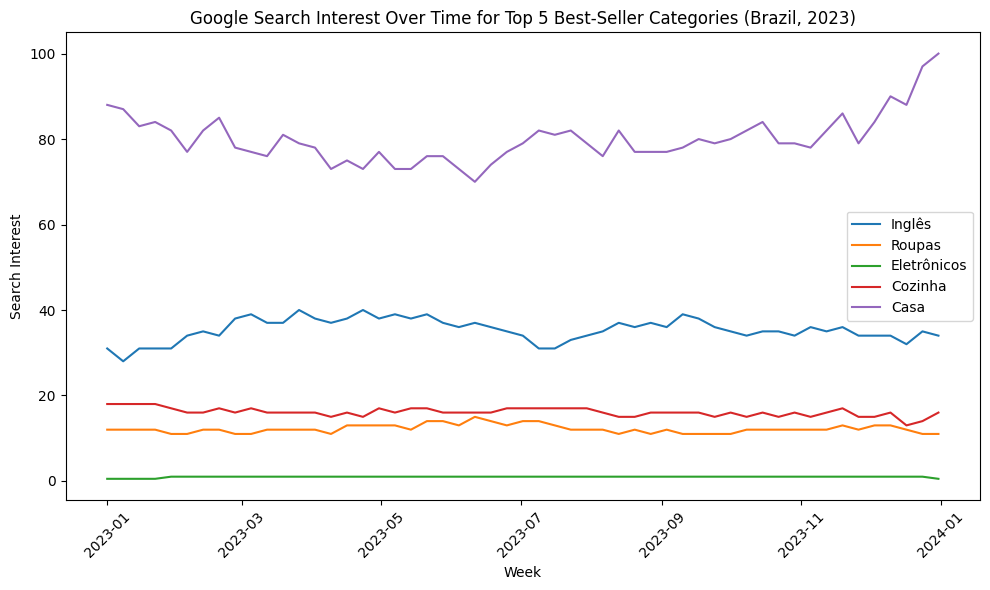

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

plt.plot(GT_b['Week'], GT_b['Inglês'], label='Inglês')
plt.plot(GT_b['Week'], GT_b['Roupas'], label='Roupas')
plt.plot(GT_b['Week'], GT_b['Eletrônicos'], label='Eletrônicos')
plt.plot(GT_b['Week'], GT_b['cozinha'], label='Cozinha')
plt.plot(GT_b['Week'], GT_b['Casa'], label='Casa')

plt.title('Google Search Interest Over Time for Top 5 Best-Seller Categories (Brazil, 2023)')
plt.xlabel('Week')
plt.ylabel('Search Interest')
plt.legend()

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


In [ ]:
GT_b.replace('<1', 0.5, inplace=True)

GT_b['Week'] = pd.to_datetime(GT_b['Week'], format='%m/%d/%Y')

GT_b['Inglês'] = pd.to_numeric(GT_b['Inglês'], errors='coerce')
GT_b['Roupas'] = pd.to_numeric(GT_b['Roupas'], errors='coerce')
GT_b['Eletrônicos'] = pd.to_numeric(GT_b['Eletrônicos'], errors='coerce')
GT_b['cozinha'] = pd.to_numeric(GT_b['cozinha'], errors='coerce')
GT_b['Casa'] = pd.to_numeric(GT_b['Casa'], errors='coerce')

category_avg_search_interest_br = GT_b[['Inglês', 'Roupas', 'Eletrônicos', 'cozinha', 'Casa']].mean()

print(category_avg_search_interest_br)


Inglês         35.358491
Roupas         12.188679
Eletrônicos     0.952830
cozinha        16.113208
Casa           80.075472
dtype: float64


In [ ]:
best_sellers_brazil = df_b[df_b['isBestSeller'] == True]

top_5_categories_br = ['Inglês e Outras Línguas', 'Roupas, Calçados e Joias', 'Eletrônicos', 'Cozinha', 'Casa']

category_avg_price_br = best_sellers_brazil[best_sellers_brazil['categoryName'].isin(top_5_categories_br)].groupby('categoryName')['price'].mean().reset_index()

print(category_avg_price_br)


               categoryName      price
0                      Casa  25.930730
1                   Cozinha  15.309701
2               Eletrônicos  54.112471
3   Inglês e Outras Línguas  21.931347
4  Roupas, Calçados e Joias  14.613791


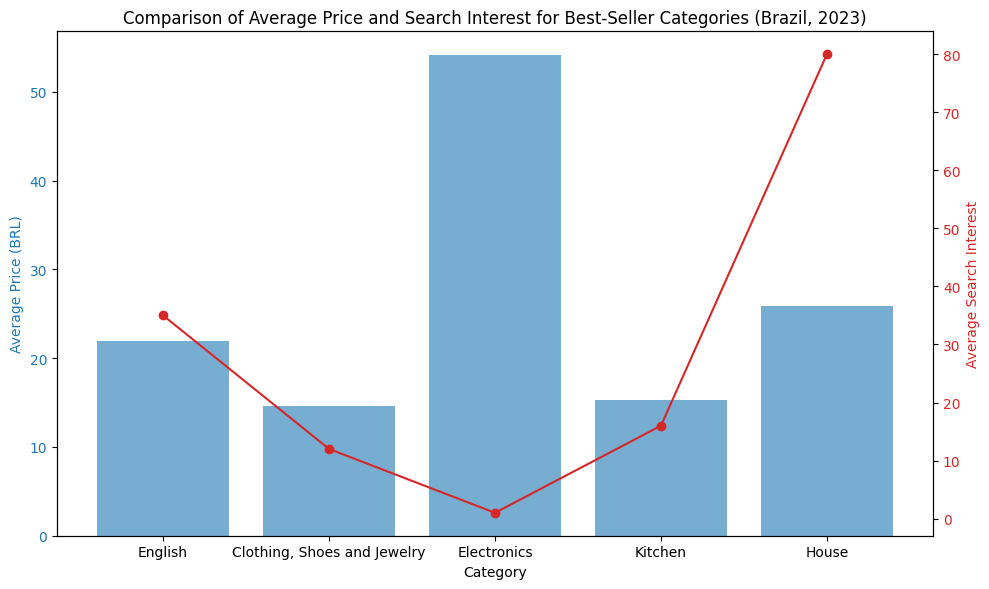

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

category_avg_price_br = {
    'English': 21.93,
    'Clothing, Shoes and Jewelry': 14.61,
    'Electronics': 54.11,
    'Kitchen': 15.31,
    'House': 25.93
}

df_avg_price_br = pd.DataFrame(list(category_avg_price_br.items()), columns=['Category', 'Average Price (BRL)'])

category_avg_search_interest_br = {
    'English': 35,
    'Clothing, Shoes and Jewelry': 12,
    'Electronics': 1,
    'Kitchen': 16,
    'House': 80
}

df_avg_search_interest_br = pd.DataFrame(list(category_avg_search_interest_br.items()), columns=['Category', 'Average Search Interest'])

df_combined_br = pd.merge(df_avg_price_br, df_avg_search_interest_br, on='Category')

fig, ax1 = plt.subplots(figsize=(10, 6))

ax1.set_xlabel('Category')
ax1.set_ylabel('Average Price (BRL)', color='tab:blue')
bars = ax1.bar(df_combined_br['Category'], df_combined_br['Average Price (BRL)'], color='tab:blue', alpha=0.6, label='Average Price')
ax1.tick_params(axis='y', labelcolor='tab:blue')

ax2 = ax1.twinx()
ax2.set_ylabel('Average Search Interest', color='tab:red')
ax2.plot(df_combined_br['Category'], df_combined_br['Average Search Interest'], color='tab:red', marker='o', label='Search Interest')
ax2.tick_params(axis='y', labelcolor='tab:red')

plt.xticks(rotation=45, ha='right', fontsize=10)

plt.subplots_adjust(bottom=0.25)

plt.title('Comparison of Average Price and Search Interest for Best-Seller Categories (Brazil, 2023)')

plt.tight_layout()
plt.show()


## 6. Consumer Demand Clustering Analysis

### **6.1 Clustering Analysis for the UK**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


features = df_uk[['price', 'reviews', 'stars']]

scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

kmeans = KMeans(n_clusters=3, random_state=0)
df_uk['cluster'] = kmeans.fit_predict(scaled_features)

cluster_1_deduplicated = df_uk[df_uk['cluster'] == 1].drop_duplicates(subset='categoryName')

cluster_analysis = df_uk.groupby('cluster').agg(
    avg_price=('price', 'mean'),
    avg_reviews=('reviews', 'mean'),
    avg_stars=('stars', 'mean'),
    count=('asin', 'count')
).reset_index()

print("Product Categories in Cluster 1 (No Duplicates):")
print(cluster_1_deduplicated[['categoryName']])
print(cluster_analysis)


Product Categories in Cluster 1 (No Duplicates):
                                       categoryName
602324                       Health & Personal Care
710981                   Camera & Photo Accessories
718218  Household Batteries, Chargers & Accessories
870092                                 Data Storage
   cluster   avg_price   avg_reviews  avg_stars   count
0        0   47.991282  8.868949e+02   4.458138  919914
1        1   23.135453  1.153201e+06   4.642105      19
2        2  167.578175  9.040473e+01   3.233205  128371


In [ ]:
cluster_1_deduplicated = df_uk[df_uk['cluster'] == 1].drop_duplicates(subset='categoryName')

unique_categories_count = cluster_1_deduplicated['categoryName'].nunique()

print(f"Unique Product Categories in Cluster 1: {unique_categories_count}")


Unique Product Categories in Cluster 1: 4


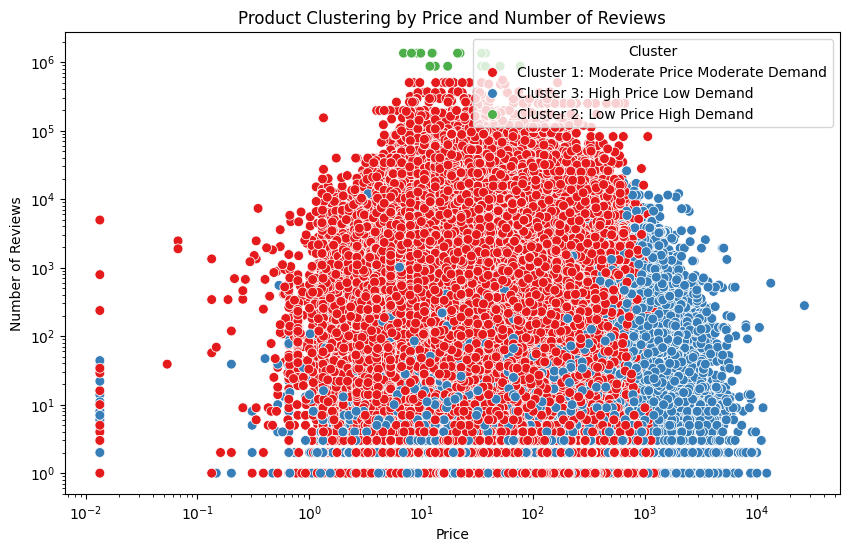

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


cluster_labels = {0: 'Cluster 1: Moderate Price Moderate Demand', 1: 'Cluster 2: Low Price High Demand', 2: 'Cluster 3: High Price Low Demand'}  # Customize the labels as needed


df_uk['cluster_label'] = df_uk['cluster'].map(cluster_labels)


plt.figure(figsize=(10, 6))

sns.scatterplot(x='price', y='reviews', hue='cluster_label', data=df_uk, palette='Set1', s=50)

plt.xlabel('Price')
plt.ylabel('Number of Reviews')
plt.title('Product Clustering by Price and Number of Reviews')

plt.xscale('log')
plt.yscale('log')

plt.legend(title='Cluster', loc='upper right')
plt.show()


### **Conclusion:**
Cluster 2 presents a strong market opportunity, despite its small size of only 19 products, due to its exceptionally high demand. These products consistently receive high reviews and ratings, yet are sold at relatively low prices. This suggests an opportunity to introduce more products within a similar price range to capitalize on the existing demand and further capture market share. By addressing this cluster, we can potentially drive more sales while maintaining customer satisfaction with affordable yet highly rated offerings.

### **6.2 Clustering Analysis for Brazil**

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans


features_brazil = df_b[['price', 'reviews', 'stars']]

scaler = StandardScaler()
scaled_features_brazil = scaler.fit_transform(features_brazil)

kmeans_brazil = KMeans(n_clusters=3, random_state=0)
df_b['cluster'] = kmeans_brazil.fit_predict(scaled_features_brazil)

cluster_analysis_brazil = df_b.groupby('cluster').agg(
    avg_price=('price', 'mean'),
    avg_reviews=('reviews', 'mean'),
    avg_stars=('stars', 'mean'),
    count=('asin', 'count')
).reset_index()

print(cluster_analysis_brazil)


   cluster  avg_price    avg_reviews  avg_stars   count
0        0  46.334089     587.808756   4.617184  339838
1        1  41.429727      37.493901   3.038718   47629
2        2  46.813659  603228.735294   4.691176      34


/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


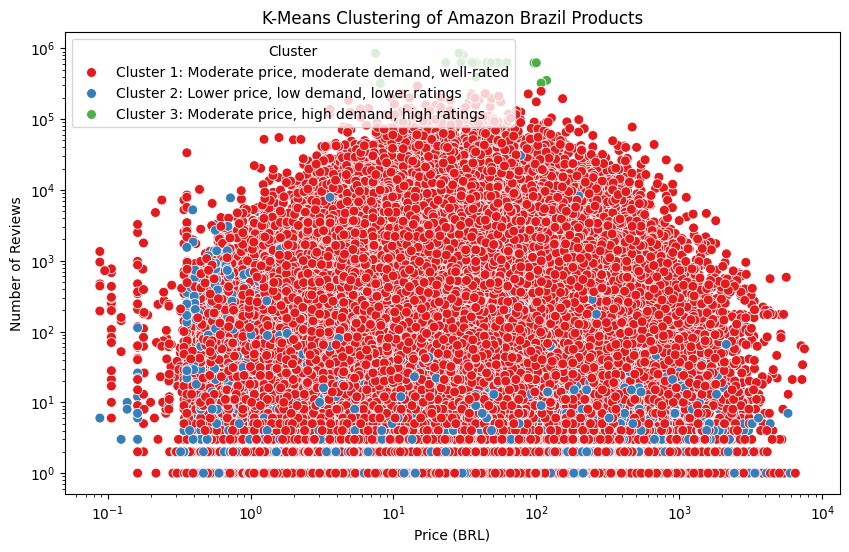

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

cluster_labels_brazil = {
    0: 'Cluster 1: Moderate price, moderate demand, well-rated',
    1: 'Cluster 2: Lower price, low demand, lower ratings',
    2: 'Cluster 3: Moderate price, high demand, high ratings'
}

df_b['Cluster'] = df_b['cluster'].map(cluster_labels_brazil)

plt.figure(figsize=(10, 6))

sns.scatterplot(x='price', y='reviews', hue='Cluster', data=df_b, palette='Set1', s=50)

plt.xlabel('Price (BRL)')
plt.ylabel('Number of Reviews')
plt.title('K-Means Clustering of Amazon Brazil Products')

plt.xscale('log')
plt.yscale('log')

plt.show()


**Conclusion:**

This suggests that Cluster 2 in Brazil contains exceptional products that drive a large number of reviews, possibly due to their market-leading position.


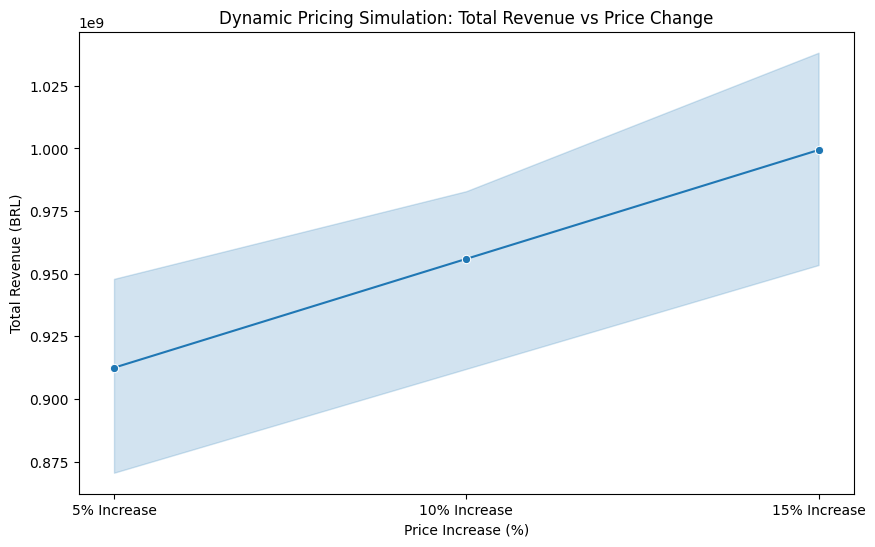

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.lineplot(x='price_increase', y='total_revenue', data=simulation_df, marker='o')

plt.title('Dynamic Pricing Simulation: Total Revenue vs Price Change')
plt.xlabel('Price Increase (%)')
plt.ylabel('Total Revenue (BRL)')

plt.xticks([0.05, 0.10, 0.15], ['5% Increase', '10% Increase', '15% Increase'])

plt.show()



**Conclusion:**
1. This suggests that Cluster 2 products can handle moderate price increases without significantly impacting demand.

2. A 15% price increase is the most effective for maximizing revenue, but it is essential to ensure that demand only slightly decreases (2%) for this strategy to be successful.
This suggests that Cluster 2 in Brazil contains exceptional products that drive a large number of reviews, possibly due to their market-leading position.

3. In both Brazil and the UK, a 15% price increase maximizes revenue, but Brazil's products can withstand higher price increases while maintaining high demand. The revenue potential in Brazil is greater, meaning that Brazilian consumers in this high-demand cluster may be less price-sensitive or more willing to pay for specific products, likely due to strong brand loyalty or product necessity.

## 7. Dynamic Pricing

 *Note*: Since we’ve identified several clusters and determined that Cluster 1 represents a strong opportunity for launching our products, it allows us to implement dynamic pricing strategies to maximize revenue. For example, with products experiencing high demand, we could gradually increase prices to capture higher profits, capitalizing on the urgency or popularity of these items. This approach balances supply and demand, ensuring we maximize revenue without alienating price-sensitive customers.








In [ ]:

cluster_1_df = df_uk[df_uk['cluster'] == 1]


price_increments = [0.05, 0.10, 0.15]  # 5%, 10%, 15% price increases


simulation_results = []

for increment in price_increments:
    cluster_1_df['new_price'] = cluster_1_df['price'] * (1 + increment)

    demand_reduction_factors = [0.98, 0.95, 0.90]

    for reduction in demand_reduction_factors:

        cluster_1_df['adjusted_reviews'] = cluster_1_df['reviews'] * reduction

        cluster_1_df['new_revenue'] = cluster_1_df['new_price'] * cluster_1_df['adjusted_reviews']

        total_revenue = cluster_1_df['new_revenue'].sum()

        simulation_results.append({
            'price_increase': increment,
            'demand_reduction': reduction,
            'total_revenue': total_revenue
        })


simulation_df = pd.DataFrame(simulation_results)
print(simulation_df)


   price_increase  demand_reduction  total_revenue
0            0.05              0.98   4.868448e+08
1            0.05              0.95   4.719414e+08
2            0.05              0.90   4.471024e+08
3            0.10              0.98   5.100279e+08
4            0.10              0.95   4.944148e+08
5            0.10              0.90   4.683930e+08
6            0.15              0.98   5.332110e+08
7            0.15              0.95   5.168882e+08
8            0.15              0.90   4.896836e+08


<ipython-input-26-91ad7909cc96>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1_df['new_price'] = cluster_1_df['price'] * (1 + increment)
<ipython-input-26-91ad7909cc96>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cluster_1_df['adjusted_reviews'] = cluster_1_df['reviews'] * reduction
<ipython-input-26-91ad7909cc96>:22: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

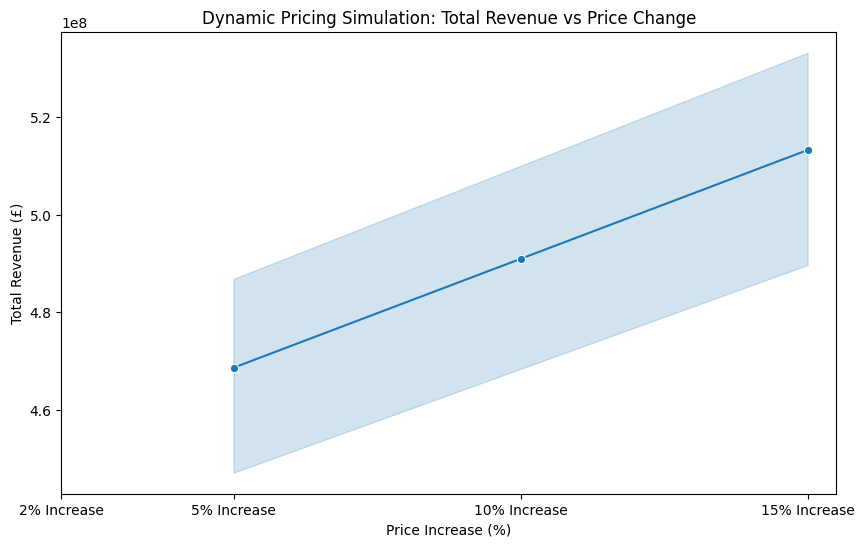

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))

sns.lineplot(x='price_increase', y='total_revenue', data=simulation_df, marker='o')

plt.title('Dynamic Pricing Simulation: Total Revenue vs Price Change')
plt.xlabel('Price Increase (%)')
plt.ylabel('Total Revenue (£)')

plt.xticks([0.02, 0.05, 0.10, 0.15], ['2% Increase', '5% Increase', '10% Increase', '15% Increase'])

plt.show()


#### **Conclusion**

Both the Google Trends and Clustering analysis confirm that affordability is a key driver of demand in categories like Grocery and Health & Personal Care. The low-priced, high-demand products in Cluster 1 align with these categories, where best-seller status is achieved with minimal search interest, indicating that consumers prioritize price over visibility. The dynamic pricing analysis further supports this, showing that a 15% price increase can maximize revenue, emphasizing the price inelasticity of these affordable products.

## 8. Rating Analysis


**Analysis problem:**
Figure out the reason why products with high rating have less bought in last month or review.

#### **Overall Visualization**

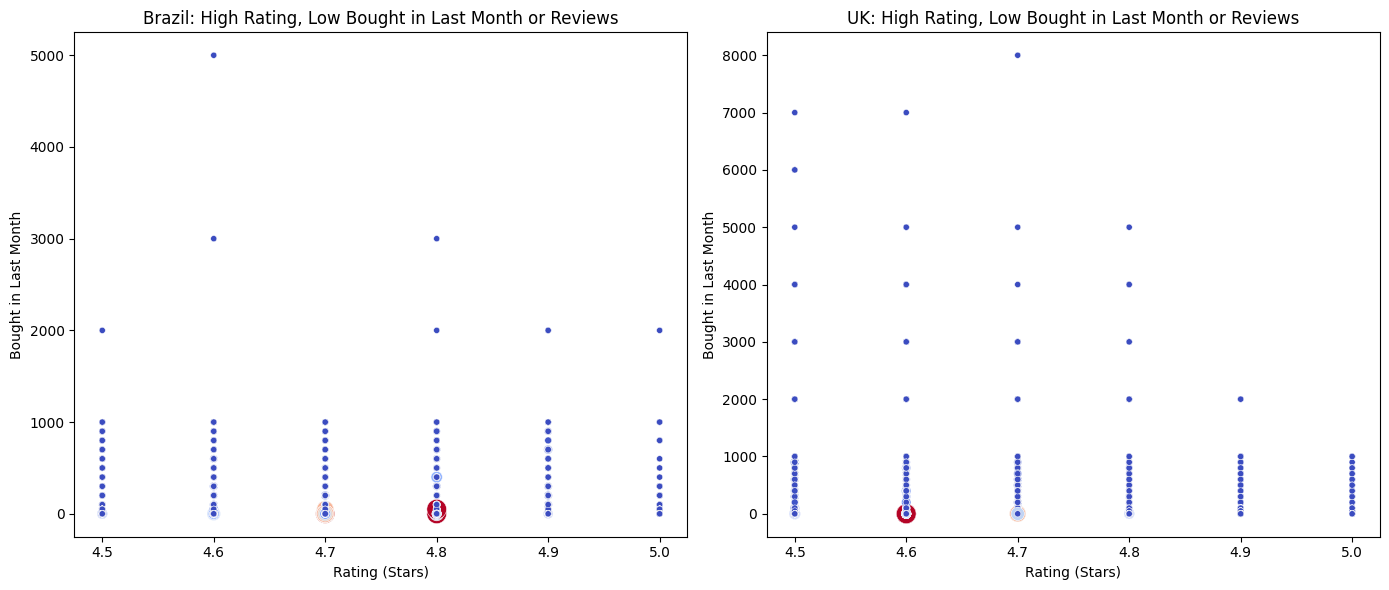

In [ ]:
df_br_filtered_low = df_br[(df_br['stars'] >= 4.5) & ((df_br['boughtInLastMonth'] < 1000) | (df_br['reviews'] < 500))]
df_uk_filtered_low = df_uk[(df_uk['stars'] >= 4.5) & ((df_uk['boughtInLastMonth'] < 1000) | (df_uk['reviews'] < 500))]

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data=df_br_filtered_low, x='stars', y='boughtInLastMonth', size='reviews', hue='reviews', sizes=(20, 200), ax=axs[0], palette='coolwarm', legend=False)
axs[0].set_title('Brazil: High Rating, Low Bought in Last Month or Reviews')
axs[0].set_xlabel('Rating (Stars)')
axs[0].set_ylabel('Bought in Last Month')

sns.scatterplot(data=df_uk_filtered_low, x='stars', y='boughtInLastMonth', size='reviews', hue='reviews', sizes=(20, 200), ax=axs[1], palette='coolwarm', legend=False)
axs[1].set_title('UK: High Rating, Low Bought in Last Month or Reviews')
axs[1].set_xlabel('Rating (Stars)')
axs[1].set_ylabel('Bought in Last Month')

plt.tight_layout()
plt.show()

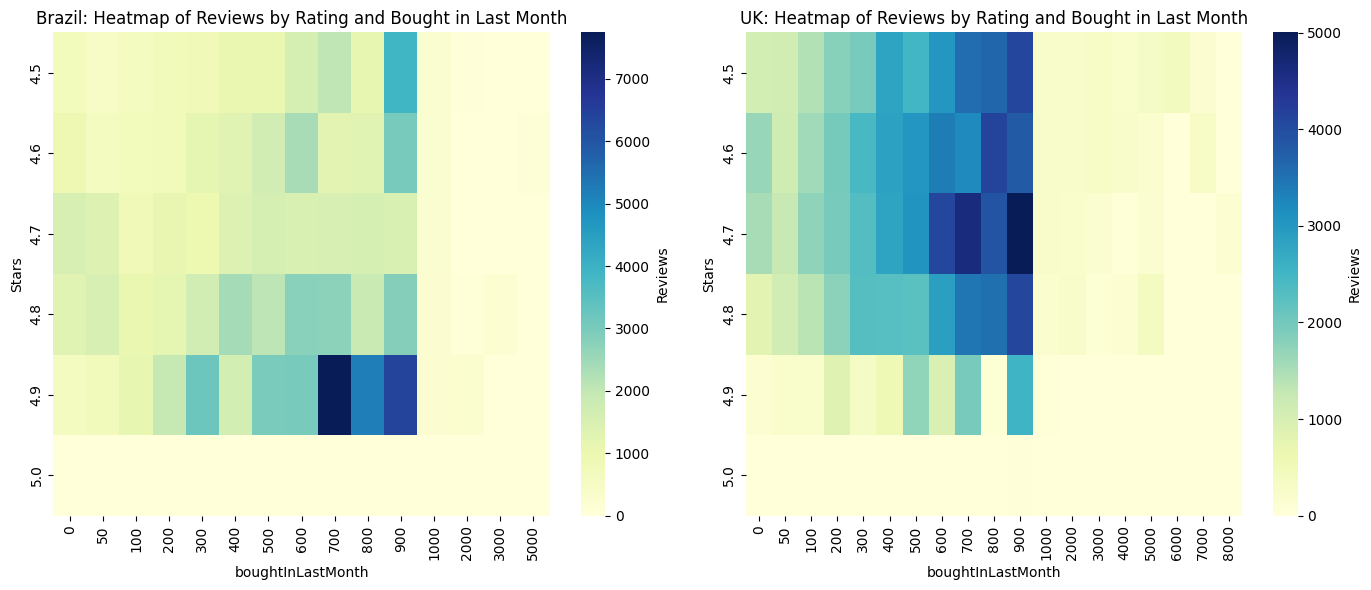

In [ ]:
fig, axs = plt.subplots(1, 2, figsize=(14, 6))

df_br_pivot = df_br_filtered_low.pivot_table(values='reviews', index='stars', columns='boughtInLastMonth', fill_value=0)
sns.heatmap(df_br_pivot, ax=axs[0], cmap="YlGnBu", cbar_kws={'label': 'Reviews'})
axs[0].set_title('Brazil: Heatmap of Reviews by Rating and Bought in Last Month')
axs[0].set_ylabel('Stars')

df_uk_pivot = df_uk_filtered_low.pivot_table(values='reviews', index='stars', columns='boughtInLastMonth', fill_value=0)
heatmap_uk = sns.heatmap(df_uk_pivot, ax=axs[1], cmap="YlGnBu", cbar_kws={'label': 'Reviews'})
axs[1].set_title('UK: Heatmap of Reviews by Rating and Bought in Last Month')
axs[1].set_ylabel('Stars')

plt.tight_layout()
plt.show()

#### 1. Brazil Market Analysis:
**Pattern of High Rating (Above 4.5) but Low Reviews and Purchases:**

In the Brazil market, many products with ratings between 4.5 and 4.9 have relatively low review counts (under 1000) and very few recent purchases (boughtInLastMonth). Notably, many products remain within the 0-300 range of purchases. This pattern is particularly prominent among products with ratings between 4.6 and 4.9. Despite their high ratings, these products have seen little recent purchasing activity, and few consumers have left reviews recently.

#### 2. UK Market Analysis:
**Pattern of High Rating (Above 4.5) but Low Reviews and Purchases:**

In the UK market, a similar pattern can be observed as in Brazil. Products with ratings between 4.7 and 4.9 show relatively low review counts and purchases, with many products having only 50-300 purchases. Among products with ratings of 4.8-4.9, there are several that show low review counts and low recent purchase activity.


## 9. Discount Rate Analysis


**Analysis Question:**

Analyzed the listPrice column to see if the impact might be related to the discount rate. Since the listPrice column only exists in the Brazil dataset, I focused the visualization on products with a rating between 4.6 and 4.9, based on the previous analysis of these visualizations

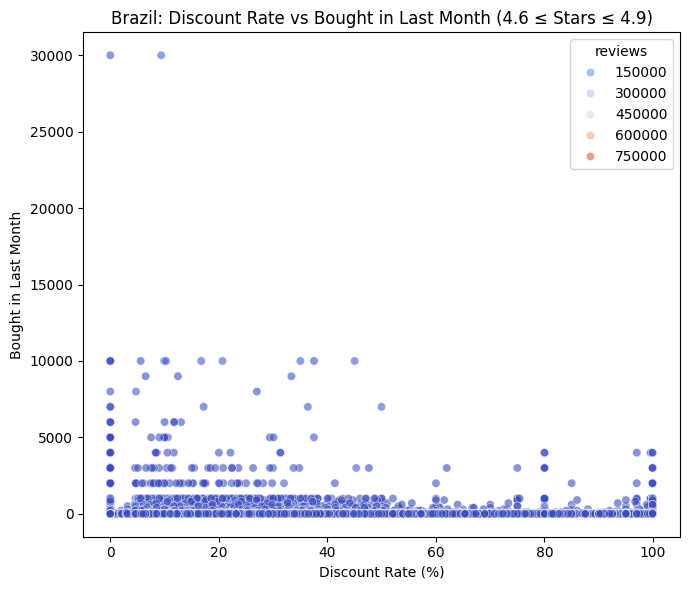

In [ ]:
df_br_discount_filtered = df_br.loc[(df_br['stars'] >= 4.6) & (df_br['stars'] <= 4.9) & (df_br['listPrice'] >= 0)].copy()
df_br_discount_filtered['discount_rate'] = ((df_br_discount_filtered['listPrice'].fillna(0) - df_br_discount_filtered['price']) / df_br_discount_filtered['listPrice'].fillna(0)) * 100

fig, ax = plt.subplots(figsize=(7, 6))

sns.scatterplot(data=df_br_discount_filtered, x='discount_rate', y='boughtInLastMonth', hue='reviews', ax=ax, palette='coolwarm', alpha=0.6)

ax.set_title('Brazil: Discount Rate vs Bought in Last Month (4.6 ≤ Stars ≤ 4.9)')
ax.set_xlabel('Discount Rate (%)')
ax.set_ylabel('Bought in Last Month')

plt.tight_layout()
plt.show()



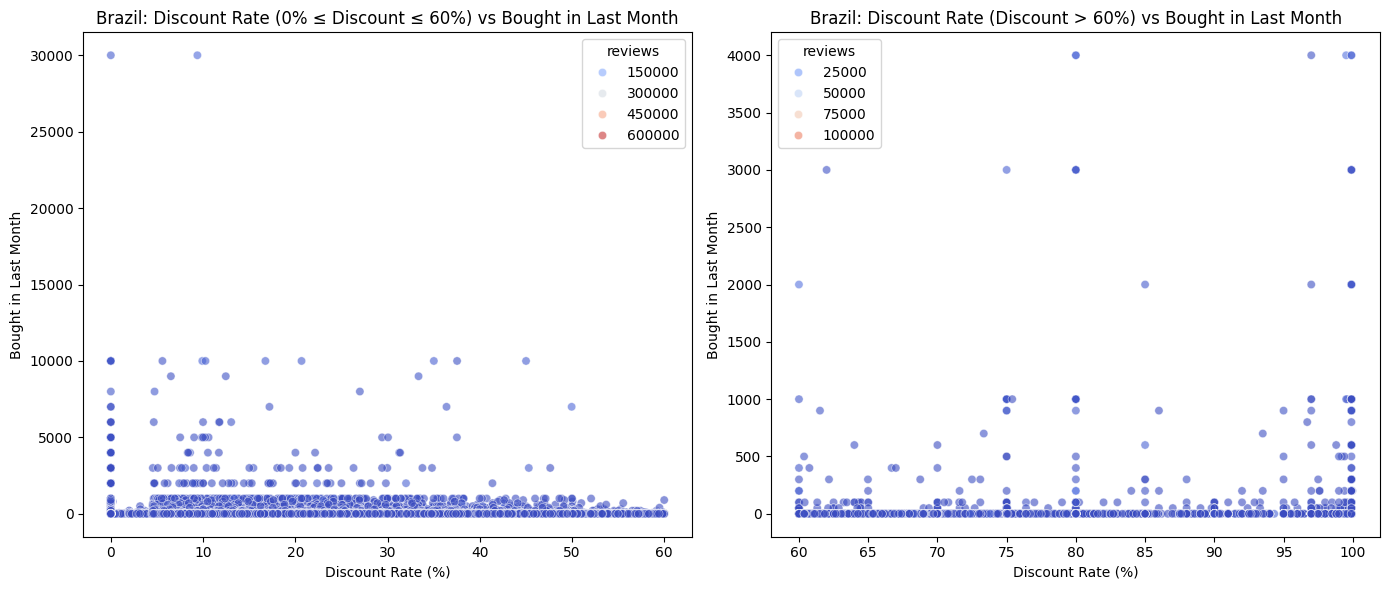

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

df_br_discount_filtered = df_br.loc[(df_br['stars'] >= 4.6) & (df_br['listPrice'] > 0)].copy()
df_br_discount_filtered['discount_rate'] = ((df_br_discount_filtered['listPrice'].fillna(0) - df_br['price']) / df_br_discount_filtered['listPrice'].fillna(0)) * 100
df_br_discount_0_60 = df_br_discount_filtered[df_br_discount_filtered['discount_rate'] <= 60]
df_br_discount_above_60 = df_br_discount_filtered[df_br_discount_filtered['discount_rate'] > 60]

fig, axs = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(data=df_br_discount_0_60, x='discount_rate', y='boughtInLastMonth', hue='reviews', ax=axs[0], palette='coolwarm', alpha=0.6)
axs[0].set_title('Brazil: Discount Rate (0% ≤ Discount ≤ 60%) vs Bought in Last Month')
axs[0].set_xlabel('Discount Rate (%)')
axs[0].set_ylabel('Bought in Last Month')

sns.scatterplot(data=df_br_discount_above_60, x='discount_rate', y='boughtInLastMonth', hue='reviews', ax=axs[1], palette='coolwarm', alpha=0.6)
axs[1].set_title('Brazil: Discount Rate (Discount > 60%) vs Bought in Last Month')
axs[1].set_xlabel('Discount Rate (%)')
axs[1].set_ylabel('Bought in Last Month')

plt.tight_layout()
plt.show()


The graph illustrates that **discount rate** does not have a clear correlation with **purchases in the last month** or **reviews**. In other words, a higher discount rate does not necessarily result in more purchases or reviews, even for products with high ratings.

### Detailed Analysis:
1. **In the 0% to 60% discount range**, most products show close to zero purchases. While a few products display higher purchase numbers despite having lower discounts, the overall impact of discount rate on purchases appears minimal.

2. **In the discount range above 60%**, even with substantial discounts, many products still exhibit very low or no purchases. Some products with discounts exceeding 90% still have minimal purchase activity.

3. **Review count** shows no strong correlation with either low or high discount rates. Products with a large number of reviews do not consistently show an increase in purchase quantities.

### Conclusion:
- **A higher discount rate does not necessarily lead to an increase in purchases or reviews**. This suggests that discount rate alone is not a strong predictor of a product’s success in terms of sales or reviews.
- The findings indicate that **other factors**—such as product quality, marketing strategies, competition, or regional preferences—could play a more significant role in driving consumer behavior.

Thus, **discount rate is not the only factor influencing purchase decisions**, and other variables need to be taken into account.


## 10. Price Range Analysis

In [ ]:
amz_br= pd. read_csv('/content/drive/MyDrive/2-Courses_24FALL/BA780_Introduction to Data Analytics/BA780 Group Project/780-A07-Team Project/Dataset/processed_amz_br.csv')

In [ ]:
amz_uk= pd. read_csv('/content/drive/MyDrive/2-Courses_24FALL/BA780_Introduction to Data Analytics/BA780 Group Project/780-A07-Team Project/Dataset/processed_amz_uk.csv')

### Price analysis for bestsellers in both UK and BR

In [ ]:
pip install googletrans==4.0.0-rc1


  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.1/55.1 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 9.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.6/42.6 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.0/65.0 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 39.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 53.6/53.6 kB 5.4 MB/s eta 0:00:00
  Created wheel for googletrans: filename=googletrans-4.0.0rc1-py3-none-any.whl size=17397 sha256=8f8a0f40275c3a93d72c05bdaae9b4a9cd75b747c97eb4945da2c671a6d09c96
  Stored in directory: /root/.cache/pip/wheels/c0/59/9f/7372f0cf70160fe61b528532e1a7c8498c4becd6bcffb022de
Successfully built googletrans
  Attempting uninstall: chardet
    Found existing installation: chardet 5.2.0
    Uninstalling chardet-5.2.0:


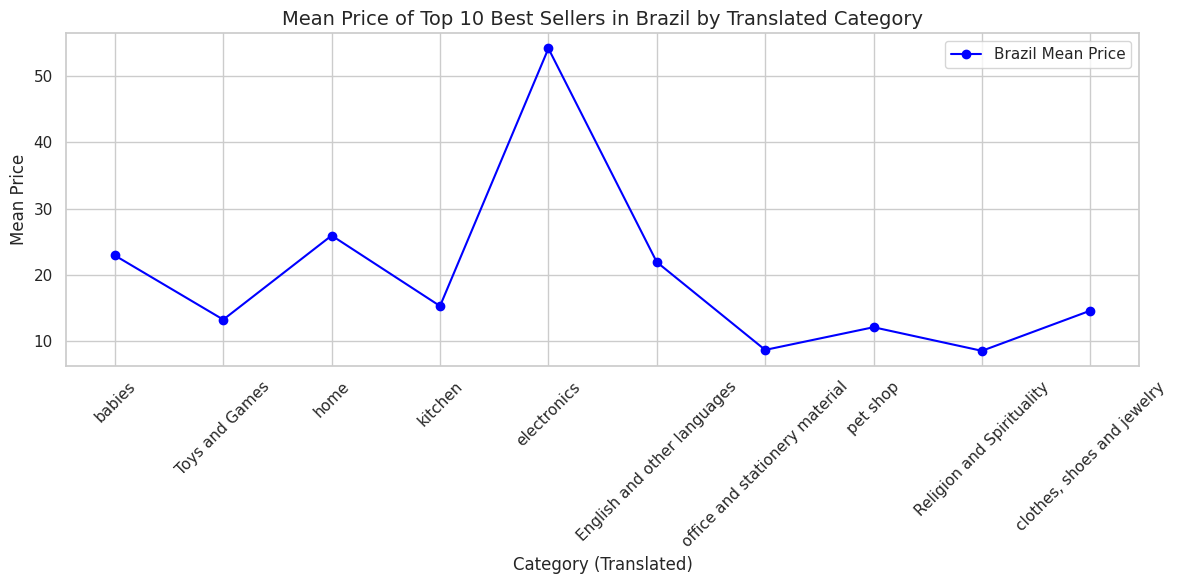

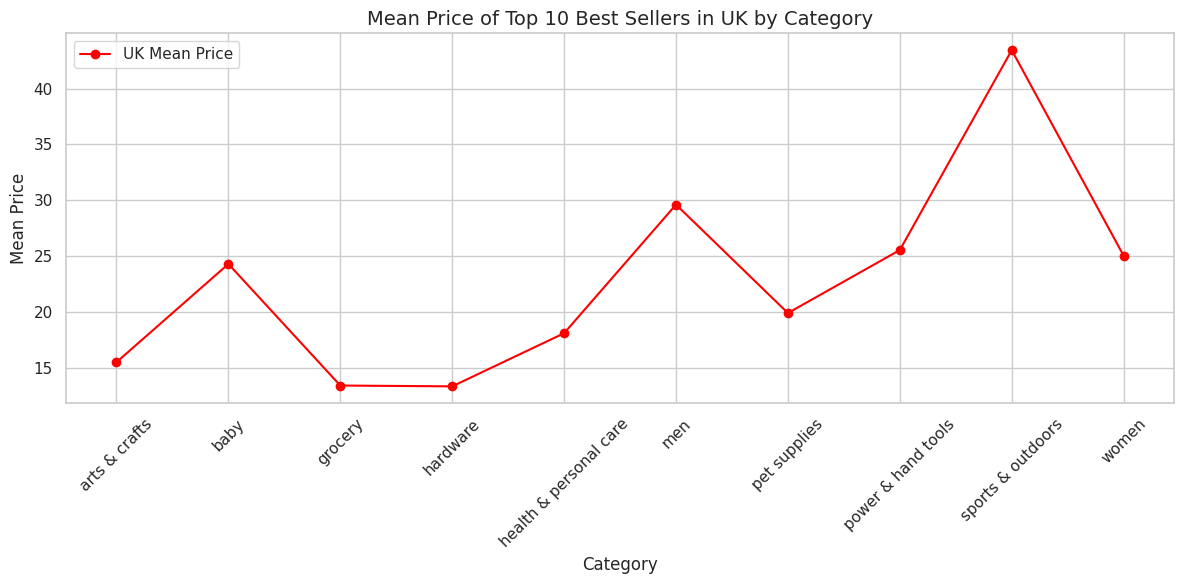

In [ ]:
from googletrans import Translator

translator = Translator()


br_top_categories = amz_br[amz_br['isBestSeller'] == 1].groupby('categoryName').size().nlargest(10).index

br_filtered = amz_br[(amz_br['isBestSeller'] == 1) & (amz_br['categoryName'].isin(br_top_categories))]

br_mean_price = br_filtered.groupby('categoryName')['price'].mean().reset_index()
br_mean_price = br_mean_price.rename(columns={'price': 'Mean Price'})


br_mean_price['categoryName_translated'] = br_mean_price['categoryName'].apply(
    lambda x: translator.translate(x, src='pt', dest='en').text
)


uk_top_categories = amz_uk[amz_uk['isBestSeller'] == 1].groupby('categoryName').size().nlargest(10).index

uk_filtered = amz_uk[(amz_uk['isBestSeller'] == 1) & (amz_uk['categoryName'].isin(uk_top_categories))]

uk_mean_price = uk_filtered.groupby('categoryName')['price'].mean().reset_index()
uk_mean_price = uk_mean_price.rename(columns={'price': 'Mean Price'})


plt.figure(figsize=(12, 6))
plt.plot(br_mean_price['categoryName_translated'], br_mean_price['Mean Price'], marker='o', label='Brazil Mean Price', color='blue')

plt.title('Mean Price of Top 10 Best Sellers in Brazil by Translated Category', fontsize=14)
plt.xlabel('Category (Translated)', fontsize=12)
plt.ylabel('Mean Price', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(uk_mean_price['categoryName'], uk_mean_price['Mean Price'], marker='o', label='UK Mean Price', color='red')


plt.title('Mean Price of Top 10 Best Sellers in UK by Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Mean Price', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()


Sellers should adopt marketing strategies and price strategies that cater to the unique preferences of each country.

In Brazil, marketing campaigns could focus on technology and electronic product.Categories like "electronics" show a much higher average price, indicating a higher demand and willingness to spend on such products. Sellers might focus on high-quality or premium electronic products for this market.

In the UK, campaigns could target sports enthusiasts, outdoor adventurers, or DIY hobbyists.The higher mean prices for categories like "sports & outdoors" suggest a strong interest in outdoor and sporting goods. Sellers should consider expanding their offerings in this category and promoting products related to outdoor activities, fitness, or sports equipment.

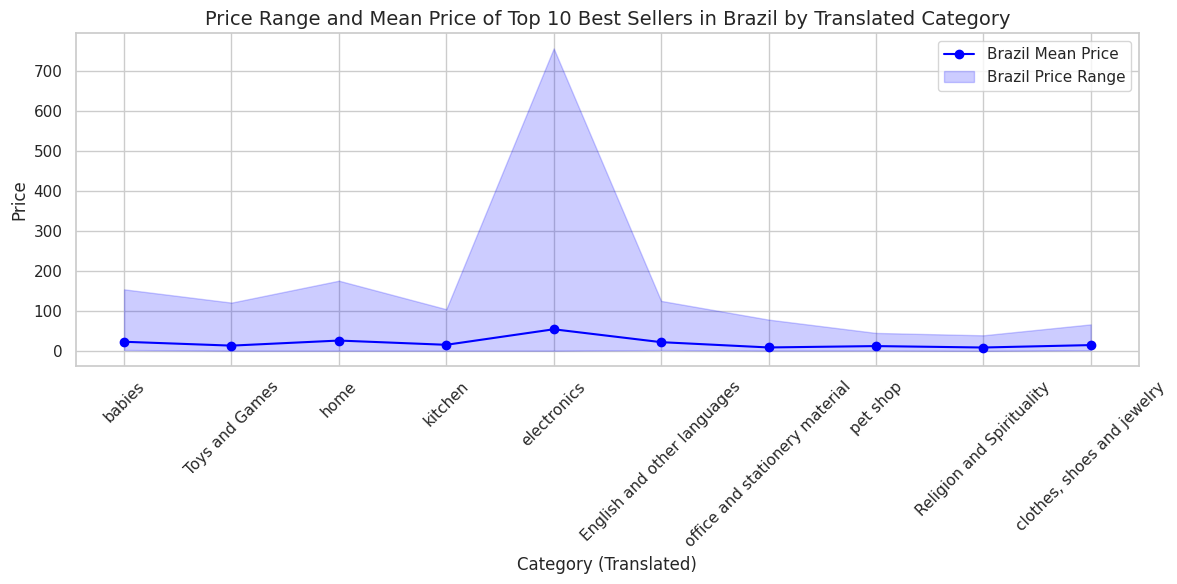

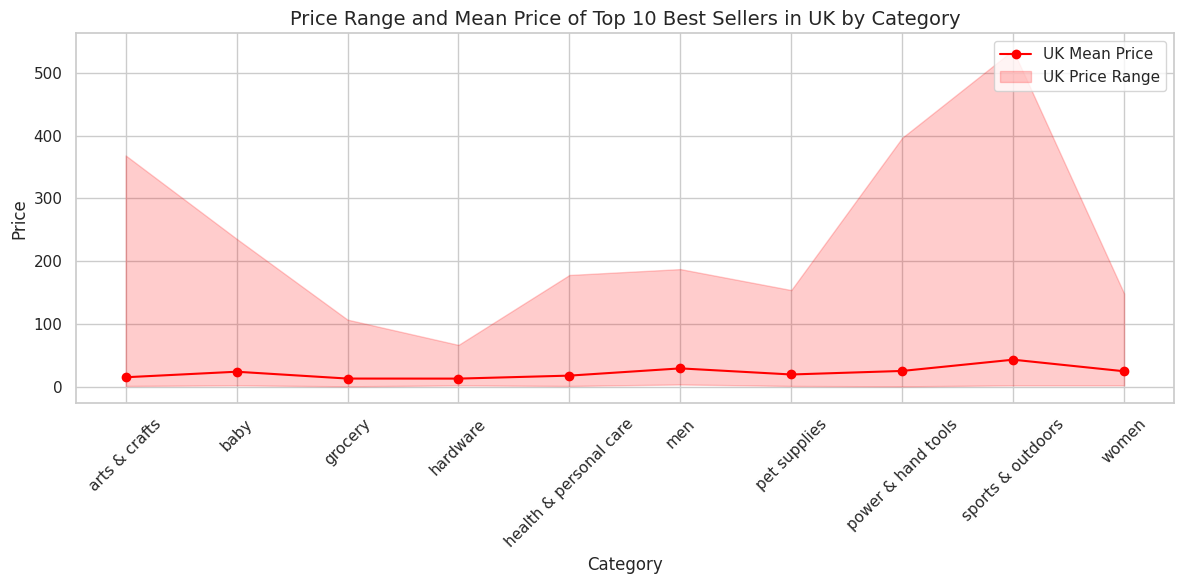

In [ ]:
from googletrans import Translator
import matplotlib.pyplot as plt

translator = Translator()

br_price_stats['categoryName_translated'] = br_price_stats['categoryName'].apply(
    lambda x: translator.translate(x, src='pt', dest='en').text
)

plt.figure(figsize=(12, 6))
plt.plot(br_price_stats['categoryName_translated'], br_price_stats['Mean Price'], marker='o', color='blue', label='Brazil Mean Price')
plt.fill_between(br_price_stats['categoryName_translated'], br_price_stats['Min Price'], br_price_stats['Max Price'], color='blue', alpha=0.2, label='Brazil Price Range')


plt.title('Price Range and Mean Price of Top 10 Best Sellers in Brazil by Translated Category', fontsize=14)
plt.xlabel('Category (Translated)', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()


plt.figure(figsize=(12, 6))
plt.plot(uk_price_stats['categoryName'], uk_price_stats['Mean Price'], marker='o', color='red', label='UK Mean Price')
plt.fill_between(uk_price_stats['categoryName'], uk_price_stats['Min Price'], uk_price_stats['Max Price'], color='red', alpha=0.2, label='UK Price Range')


plt.title('Price Range and Mean Price of Top 10 Best Sellers in UK by Category', fontsize=14)
plt.xlabel('Category', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()


In Brazil, the "electronics" category stands out with a much wider price range compared to other categories, indicating significant variation in product pricing within this category. This could be due to a mix of both high-end and budget products.

In the UK, the categories "arts & crafts" and "sports & outdoors" show wider price ranges, suggesting a similar situation where both premium and lower-priced products are popular within these categories.

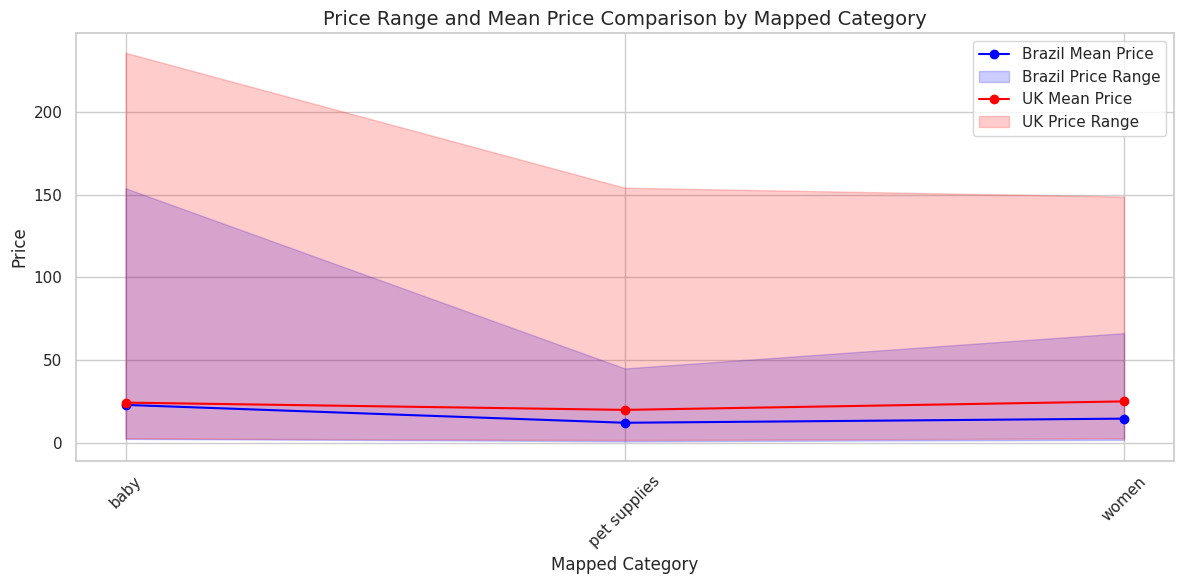

In [ ]:

category_mapping = {
    'babies': 'baby',
    'pet shop': 'pet supplies',
    'clothes, shoes and jewelry': 'women'
}


br_mapped = br_price_stats[br_price_stats['categoryName_translated'].isin(category_mapping.keys())].copy()
br_mapped['Mapped Category'] = br_mapped['categoryName_translated'].map(category_mapping)

uk_mapped = uk_price_stats[uk_price_stats['categoryName'].isin(category_mapping.values())].copy()


merged_data = br_mapped.merge(uk_mapped, left_on='Mapped Category', right_on='categoryName', suffixes=('_Brazil', '_UK'))


plt.figure(figsize=(12, 6))


plt.plot(merged_data['Mapped Category'], merged_data['Mean Price_Brazil'], marker='o', color='blue', label='Brazil Mean Price')
plt.fill_between(merged_data['Mapped Category'], merged_data['Min Price_Brazil'], merged_data['Max Price_Brazil'], color='blue', alpha=0.2, label='Brazil Price Range')


plt.plot(merged_data['Mapped Category'], merged_data['Mean Price_UK'], marker='o', color='red', label='UK Mean Price')
plt.fill_between(merged_data['Mapped Category'], merged_data['Min Price_UK'], merged_data['Max Price_UK'], color='red', alpha=0.2, label='UK Price Range')

plt.title('Price Range and Mean Price Comparison by Mapped Category', fontsize=14)
plt.xlabel('Mapped Category', fontsize=12)
plt.ylabel('Price', fontsize=12)
plt.xticks(rotation=45)
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()


The broader price ranges in the UK indicate an existing market for luxury or premium products, making it a suitable market for expanding high-end product lines. However, in Brazil, sellers may need to prioritize value-focused products and gradually introduce premium options as the market matures.

In [ ]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import StandardScaler

brazil_data=pd.read_csv('/content/gdrive/MyDrive/BA780 Group Project/Copy of processed_amz_br.csv')
uk_data=pd.read_csv('/content/gdrive/MyDrive/BA780 Group Project/Copy of processed_amz_uk.csv')

## 11. Key Variables and Product Categories for Predicting 'Bought Last Month'

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder



encoder = OneHotEncoder(drop='first', sparse_output=False)
encoded_categories = encoder.fit_transform(brazil_data[['categoryName']])

encoded_categories_df = pd.DataFrame(encoded_categories, columns=encoder.get_feature_names_out(['categoryName']))

brazil_data_encoded = pd.concat([brazil_data.reset_index(drop=True), encoded_categories_df], axis=1)

X = brazil_data_encoded.drop(columns=['asin', 'title', 'productURL', 'categoryName','discount_level','boughtInLastMonth'])
y = brazil_data_encoded['boughtInLastMonth']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

y_pred = rf_model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error (MSE): {mse}')
print(f'R-squared: {r2}')


Mean Squared Error (MSE): 35227.948712484904
R-squared: 0.29904371383117934


In [ ]:
feature_importances = rf_model.feature_importances_

features_with_importance = zip(X.columns, feature_importances)

sorted_features = sorted(features_with_importance, key=lambda x: x[1], reverse=True)[:10]

for name, importance in sorted_features:
    print(f'{name}: {importance}')

reviews: 0.3595079237736881
price: 0.18277832995205798
stars: 0.07150760254219929
listPrice: 0.06385078970541186
categoryName_Cuidados com o Cabelo: 0.057693888815158106
discount_percentage: 0.05284312381105049
isBestSeller: 0.028856009674863303
categoryName_Produtos de Cuidados com a Pele: 0.02835620047190828
categoryName_Troca de Fraldas do Bebê: 0.016355425777233895
categoryName_Saúde e Cuidados Pessoais: 0.01341162699849972


### **Findings:**
**Reviews as the Strongest Predictor:** The feature with the highest importance is the number of reviews (importance score: 0.36). This suggests that reviews have the most significant impact on predicting the target variable. It indicates that products with more reviews are likely to be more influential in the model's decision-making process, possibly because higher review counts are associated with higher visibility and consumer trust.

**Price Plays a Significant Role:** Price is the second most important feature (importance score: 0.18). Pricing can be a major factor in influencing consumer behavior, and this importance implies that customers are sensitive to pricing, and it greatly affects sales outcomes. Lower or competitive prices may drive more purchases, while higher prices could deter buyers.

**Stars Have Moderate Importance:** The star rating of products (importance score: 0.07) ranks third in importance. This reflects the fact that product ratings are important to consumer decision-making, but not as influential as reviews or price. Ratings likely help users make a decision but may not be as persuasive as seeing a large number of reviews.

### **Conclusion:**
The model reveals that consumer-generated content (e.g., reviews and ratings) and price are the most influential factors in predicting consumer behavior. Discounts and specific product categories also play a role, though to a lesser extent. This analysis can inform strategies such as focusing marketing efforts on products with high reviews and adjusting pricing or discount strategies to attract more consumers.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

importances = rf_model.feature_importances_
features = X.columns

feature_importance_df = pd.DataFrame({
    'Feature': features,
    'Importance': importances
})

feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

top_n = 10
top_features = feature_importance_df.head(top_n)


plt.figure(figsize=(10, 6))
bars=plt.barh(top_features['Feature'], top_features['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title(f'Top {top_n} Feature Importances')
plt.gca().invert_yaxis()
plt.show()


# **EDA Conclusion:**



The EDA results from Jessica, Paul, Vivian, Eve, and Courtney provide valuable insights for sellers looking to sell products on Amazon in Brazil and the UK. First, regarding star ratings and the number of reviews, both markets show a clustering of ratings between 4.0 and 5.0, with more reviews generally associated with higher ratings. However, it’s important to note that this relationship is not strictly linear, meaning that while higher-rated products tend to have more reviews, the number of reviews may not necessarily correlate directly with sales volume. Sellers should, therefore, strategically focus on managing star ratings while encouraging reviews to maximize their impact.

Looking at the relationship between price and reviews, the analysis reveals that initially, higher-priced products tend to have fewer reviews. After a certain point, however, an increase in reviews does not lead to significant price changes, indicating a nonlinear pattern. This is particularly important for sellers of high-priced items. In the UK, lower-priced alternatives are more abundant, leading to fewer reviews for expensive products. Meanwhile, in Brazil, higher-priced items tend to attract more reviews, suggesting that Brazilian consumers may place more emphasis on reviews when purchasing premium products, possibly due to limited access to such items or cultural differences in review behavior.

From a category pricing strategy perspective, the demand for premium products such as electronics is stronger in Brazil. In contrast, the UK shows higher average prices in categories like sports, outdoor, and DIY, indicating an opportunity to expand premium offerings in these areas. In Brazil, it may be effective to focus initially on value-for-money products and gradually introduce premium products as the market matures.

Products in Cluster 2, characterized by low prices and high demand, present a significant opportunity, particularly in Brazil. These products can handle price increases of up to 15% without a significant decrease in demand, providing a chance for sellers to maximize profitability through moderate price hikes. Brazilian consumers, particularly in categories like electronics, tend to be less price-sensitive due to factors such as brand loyalty or product necessity, allowing for higher price flexibility in these premium categories.

In conclusion, when developing a sales strategy for Amazon in Brazil and the UK, sellers should focus on driving interest in premium products in Brazil while initially prioritizing value-driven offerings. In the UK, expanding premium product ranges in categories like sports, outdoor, and DIY could prove beneficial. By understanding the price sensitivity and review behavior in each market, sellers can develop localized strategies to maximize profitability.

# **Optimized System for Helping Sellers with Trending Titles and Product Recommendations**

## Trending Title Generator System
To create a Trending Title Generator System, I utilized the BoughtInLastMonth, bestseller, stars, and reviews columns from the Brazil and UK datasets to generate a trendy score

In [ ]:
import pandas as pd

df_br = pd.read_csv('/content/gdrive/MyDrive/780-A07-Team Project/Dataset/processed_amz_br.csv')
df_uk = pd.read_csv('/content/gdrive/MyDrive/780-A07-Team Project/Dataset/processed_amz_uk.csv')

### Trending Score Calculation


In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm

tqdm.pandas()

class TrendyScoreCalculator:
    def __init__(self, max_reviews):
        self.max_reviews = max_reviews

    def calculate_trendy_score(self, row):
        weight_bought = 0.4
        weight_bestseller = 0.2
        weight_stars = 0.3
        weight_reviews = 0.1

        score_bought = weight_bought * (1 if row['boughtInLastMonth'] > 0 else 0)
        score_bestseller = weight_bestseller * (1 if row['isBestSeller'] == True else 0)
        score_stars = weight_stars * (row['stars'] / 5.0)
        score_reviews = weight_reviews * np.log1p(row['reviews'])

        total_score = score_bought + score_bestseller + score_stars + score_reviews
        return total_score

uk_calculator = TrendyScoreCalculator(max_reviews=1356658)
br_calculator = TrendyScoreCalculator(max_reviews=856685)

df_br['trendy_score'] = df_br.progress_apply(br_calculator.calculate_trendy_score, axis=1)
df_uk['trendy_score'] = df_uk.progress_apply(uk_calculator.calculate_trendy_score, axis=1)

100%|██████████| 1048304/1048304 [00:30<00:00, 34177.17it/s]


  ### Trending Score Calculation Algorithm

This algorithm calculates a **trendy score** for products using four key factors: **BoughtInLastMonth**, **isBestSeller**, **stars**, and **reviews**. Each factor is assigned a specific weight: **BoughtInLastMonth** contributes 40%, **isBestSeller** adds 20%, **stars** account for 30%, and **reviews** provide 10%. The `TrendyScoreCalculator` class computes these scores for products in the Brazil (`df_br`) and UK (`df_uk`) datasets. The score for each product is determined by normalizing the star rating, applying logarithmic scaling to the number of reviews, and using a weighted sum of all factors. The algorithm uses `progress_apply` to apply the score calculation across the datasets with a progress bar from `tqdm` to track the computation.


### Trending Score Visualization

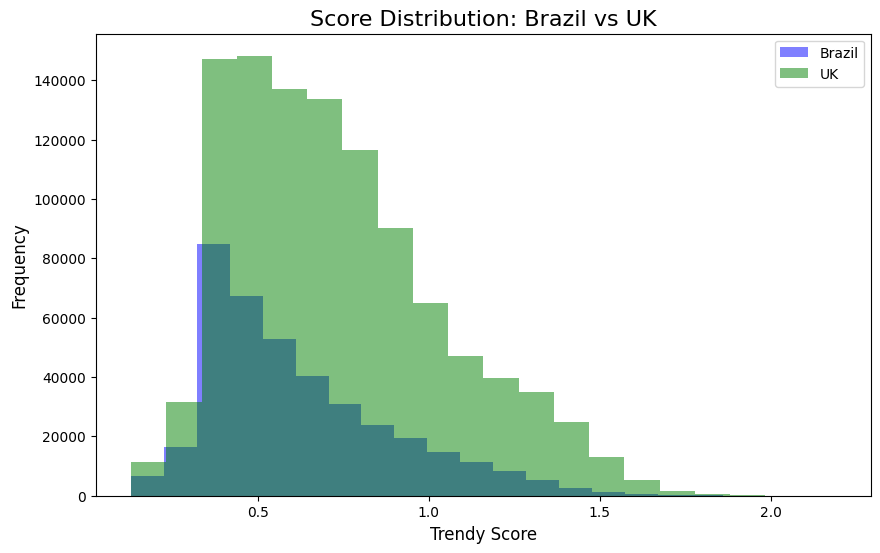

In [ ]:
import matplotlib.pyplot as plt

def plot_score_distribution(br_scores, uk_scores):
    plt.figure(figsize=(10, 6))

    plt.hist(br_scores, bins=20, alpha=0.5, label='Brazil', color='blue')

    plt.hist(uk_scores, bins=20, alpha=0.5, label='UK', color='green')

    plt.title('Score Distribution: Brazil vs UK', fontsize=16)
    plt.xlabel('Trendy Score', fontsize=12)
    plt.ylabel('Frequency', fontsize=12)
    plt.legend()
    plt.show()

plot_score_distribution(df_br['trendy_score'], df_uk['trendy_score'])

<ipython-input-30-47ae229a0b06>:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(br_scores, shade=True, label='Brazil', color='blue')
<ipython-input-30-47ae229a0b06>:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(uk_scores, shade=True, label='UK', color='green')


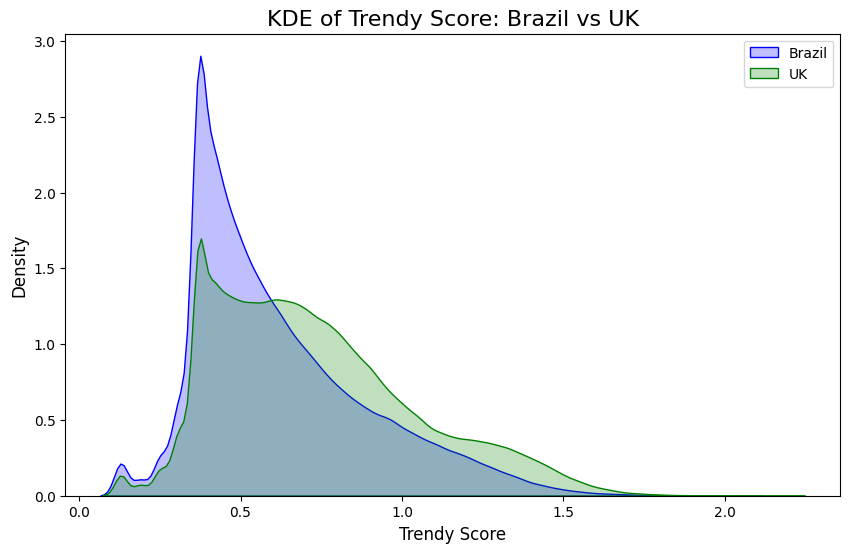

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_kde_distribution(br_scores, uk_scores):
    plt.figure(figsize=(10, 6))

    sns.kdeplot(br_scores, shade=True, label='Brazil', color='blue')

    sns.kdeplot(uk_scores, shade=True, label='UK', color='green')

    plt.title('KDE of Trendy Score: Brazil vs UK', fontsize=16)
    plt.xlabel('Trendy Score', fontsize=12)
    plt.ylabel('Density', fontsize=12)
    plt.legend()
    plt.show()

plot_kde_distribution(df_br['trendy_score'], df_uk['trendy_score'])

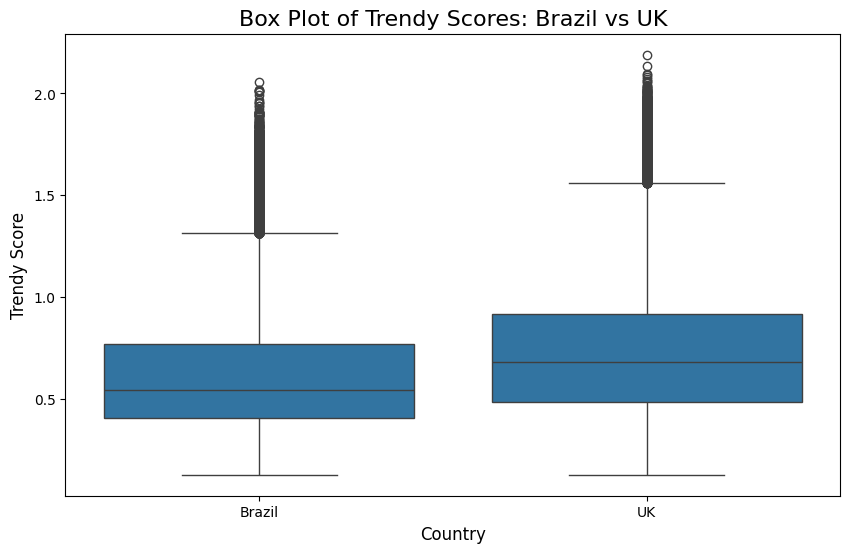

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

def plot_boxplot_distribution(br_scores, uk_scores):
    plt.figure(figsize=(10, 6))

    data = {
        'Scores': list(br_scores) + list(uk_scores),
        'Country': ['Brazil'] * len(br_scores) + ['UK'] * len(uk_scores)
    }
    df = pd.DataFrame(data)

    sns.boxplot(x='Country', y='Scores', data=df)

    plt.title('Box Plot of Trendy Scores: Brazil vs UK', fontsize=16)
    plt.xlabel('Country', fontsize=12)
    plt.ylabel('Trendy Score', fontsize=12)

    plt.show()

plot_boxplot_distribution(df_br['trendy_score'], df_uk['trendy_score'])


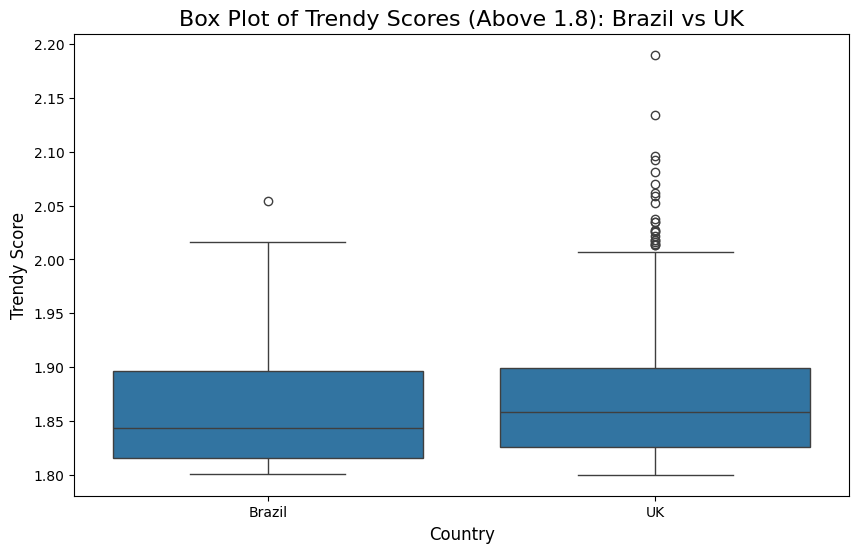

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_boxplot_above_threshold(br_scores, uk_scores, threshold=1.8):
    plt.figure(figsize=(10, 6))

    br_top_scores = br_scores[br_scores >= threshold]
    uk_top_scores = uk_scores[uk_scores >= threshold]

    data = {
        'Scores': list(br_top_scores) + list(uk_top_scores),
        'Country': ['Brazil'] * len(br_top_scores) + ['UK'] * len(uk_top_scores)
    }
    df = pd.DataFrame(data)

    sns.boxplot(x='Country', y='Scores', data=df)

    plt.title(f'Box Plot of Trendy Scores (Above {threshold}): Brazil vs UK', fontsize=16)
    plt.xlabel('Country', fontsize=12)
    plt.ylabel('Trendy Score', fontsize=12)

    plt.show()

plot_boxplot_above_threshold(df_br['trendy_score'], df_uk['trendy_score'], threshold=1.8)

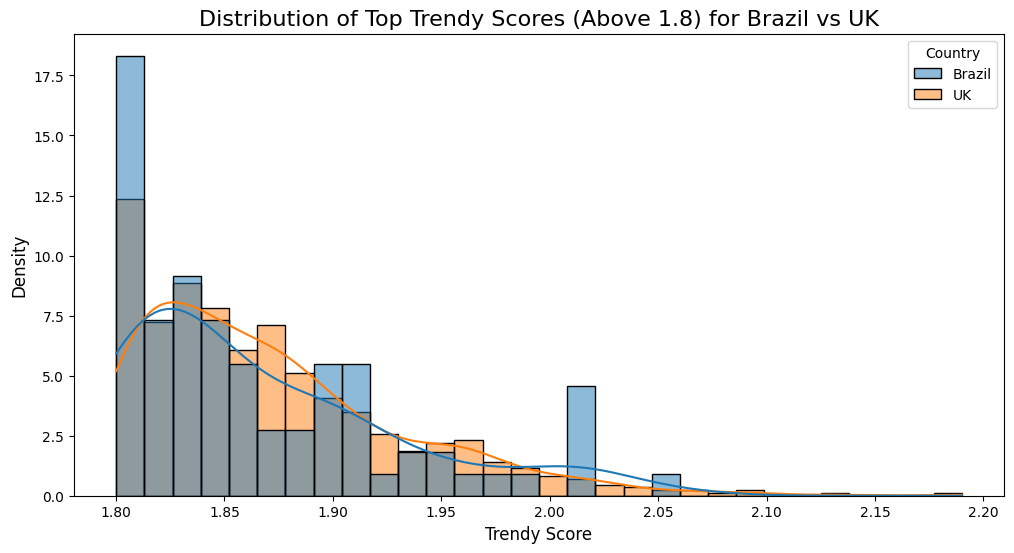

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

def plot_top_score_distribution(br_scores, uk_scores, threshold=0.8):
    plt.figure(figsize=(12, 6))

    br_top_scores = br_scores[br_scores >= threshold]
    uk_top_scores = uk_scores[uk_scores >= threshold]

    data = {
        'Scores': list(br_top_scores) + list(uk_top_scores),
        'Country': ['Brazil'] * len(br_top_scores) + ['UK'] * len(uk_top_scores)
    }
    df = pd.DataFrame(data)

    sns.histplot(df, x='Scores', hue='Country', kde=True, stat="density", common_norm=False, bins=30)

    plt.title('Distribution of Top Trendy Scores (Above 1.8) for Brazil vs UK', fontsize=16)
    plt.xlabel('Trendy Score', fontsize=12)
    plt.ylabel('Density', fontsize=12)

    plt.show()

plot_top_score_distribution(df_br['trendy_score'], df_uk['trendy_score'], threshold=1.8)

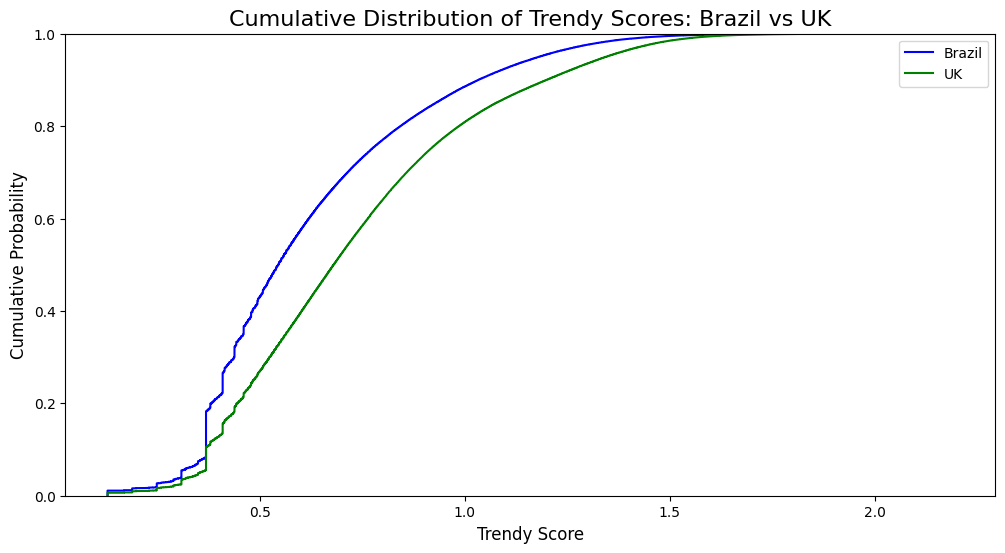

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

def plot_cdf_distribution(br_scores, uk_scores):
    plt.figure(figsize=(12, 6))

    data = {
        'Scores': list(br_scores) + list(uk_scores),
        'Country': ['Brazil'] * len(br_scores) + ['UK'] * len(uk_scores)
    }
    df = pd.DataFrame(data)

    sns.ecdfplot(data=df[df['Country'] == 'Brazil'], x='Scores', label='Brazil', color='blue')
    sns.ecdfplot(data=df[df['Country'] == 'UK'], x='Scores', label='UK', color='green')

    plt.title('Cumulative Distribution of Trendy Scores: Brazil vs UK', fontsize=16)
    plt.xlabel('Trendy Score', fontsize=12)
    plt.ylabel('Cumulative Probability', fontsize=12)

    plt.legend()
    plt.show()

plot_cdf_distribution(df_br['trendy_score'], df_uk['trendy_score'])


### Overall Interpretation of the Graphs

The graphs above visualize the distribution and comparison of trendy scores between Brazil and the UK, highlighting key insights regarding product trends based on various metrics like **boughtInLastMonth**, **reviews**, and **discount rate**. The histograms, KDE plots, box plots, and cumulative distributions provide an in-depth look at how the trendy scores are spread across both regions.

From the **Score Distribution** and **KDE plots**, we can observe that the distribution of trendy scores in Brazil tends to be slightly skewed towards lower values compared to the UK. Brazil has a higher density of products with trendy scores below 1.0, whereas the UK shows a more evenly distributed trend across a wider range of scores.

The **Box Plots** further emphasize this trend, showing that Brazil has a narrower interquartile range (IQR), with more outliers in the higher trendy score ranges. This indicates that while most products in Brazil fall into the lower trendy score categories, there are a few that score exceptionally high. In comparison, the UK's box plot suggests a slightly more balanced distribution with fewer outliers at the top end.

The **Cumulative Distribution** graph reinforces this interpretation, showing that Brazil's trendy scores accumulate faster at lower values, whereas the UK's scores rise more gradually, indicating a more diverse spread of trendy products across the score spectrum.

### Why We Chose 1.8 as the Threshold

The threshold of 1.8 for the trendy score was selected due to practical limitations encountered when processing data with the ChatGPT API. Initially, when we attempted to process too many rows, we encountered the following error:

> "Rate limit reached for gpt-4 on tokens per minute (TPM): Limit 30000."

This error indicated that the requested number of tokens exceeded the allowed limit, making it difficult to analyze larger datasets. After conducting several experiments with different score thresholds, we found that selecting rows with a trendy score above 1.8 provided an optimal solution. This threshold allowed us to capture the highest scores while keeping the number of rows manageable within the API’s rate limits, thus allowing efficient processing and analysis without exceeding the token restrictions.


In [ ]:
top_br_trendy = df_br[df_br['trendy_score'] > 1.8]
top_uk_trendy = df_uk[df_uk['trendy_score'] > 1.8]
print(f"BR: {len(top_br_trendy)}")
print(f"UK: {len(top_uk_trendy)}")

BR: 84
UK: 661


### Factors Influencing the Difference in the Number of Trendy Products Between Brazil and the UK

The significant difference in the number of trendy products between Brazil and the UK could naturally arise from differences in the nature of the data or the size of the markets. However, a few factors can be considered:

1. Differences in data collection: The UK market is likely larger than Brazil’s, so there may be more trendy products in the UK. In a bigger market, it’s possible to have a larger variety of popular products.

2. Market size differences: Amazon UK is likely a bigger market than Brazil, leading to a larger number of trendy products. In larger markets, more popular products tend to exist.

3. Timing of data collection: There might be a difference in the timing or period during which the data was collected. For example, the UK might have had more trendy products at a specific point in time compared to Brazil.

4. Different criteria for trends: The reason for more products in the UK could be that consumers there left more reviews and higher ratings for certain products. As a result, the criteria for trendy products in the UK might be more widespread. In contrast, Brazil may have a smaller market or fewer products that meet the thresholds for reviews or ratings. Is the analysis of trendy patterns still valid?: Yes, the analysis is still valid. Since the goal is to analyze the title patterns of trendy products, the difference in data sizes between the two countries doesn't matter much. The most popular products may vary by market, and GPT API can still generate titles based on the patterns observed. The difference in the number of trendy products between the UK and Brazil won't directly affect the learning outcomes of GPT-4 API significantly, as the primary purpose is to extract title patterns from the top trendy products in each market.

Conclusion: The difference in the number of trendy products between Brazil and the UK is a natural result of the characteristics of each market. For the purpose of analyzing trendy product title patterns, this difference is not a problem, and effective patterns can be learned from the top trendy products in each market.

In [ ]:
top_br_trendy = top_br_trendy['title']
top_br_trendy.to_csv('/content/gdrive/MyDrive/780-A07-Team Project/Dataset/top_br_trendy.csv', index=False)

top_uk_trendy = top_uk_trendy['title']
top_uk_trendy.to_csv('/content/gdrive/MyDrive/780-A07-Team Project/Dataset/top_uk_trendy.csv', index=False)

In [ ]:
import pandas as pd
df_br_tr = pd.read_csv('/content/gdrive/MyDrive/780-A07-Team Project/Dataset/top_br_trendy.csv')
df_uk_tr = pd.read_csv('/content/gdrive/MyDrive/780-A07-Team Project/Dataset/top_uk_trendy.csv')

In [ ]:
pip install openai==0.28

In [ ]:
pip install deep-translator

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.3/42.3 kB 1.8 MB/s eta 0:00:00


In [ ]:
import openai
import pandas as pd
from deep_translator import GoogleTranslator

openai.api_key = ""

def generate_product_name_based_on_titles(existing_titles, product_description):

    title_examples = "\n".join([f"- {title}" for title in existing_titles])

    prompt = f"""
    Below are some examples of trendy product titles:
    {title_examples}

    Based on these examples, create a trendy product name for the following product description:
    {product_description}
    """

    response = openai.ChatCompletion.create(
        model="gpt-4o",
        messages=[
            {"role": "system", "content": "You are a helpful assistant that generates trendy product titles."},
            {"role": "user", "content": prompt}
        ],
        max_tokens=50
    )


    generated_title = response['choices'][0]['message']['content'].strip()
    return generated_title


def translate_to_english(text):
    translator = GoogleTranslator(source='auto', target='en')
    return translator.translate(text)

existing_titles_br = df_br_tr['title'].tolist()
existing_titles_uk = df_uk_tr['title'].tolist()

while True:
    product_description = input("Enter the description of the product you want to sell (type 'exit' to quit): ")

    if product_description.lower() == 'exit':
        print("Exiting the system.")
        break

    country_choice = input("Should we use trendy titles from Brazil or UK? (Brazil/UK): ").lower()

    if country_choice == 'brazil':
        trendy_title = generate_product_name_based_on_titles(existing_titles_br, product_description)
    elif country_choice == 'uk':
        trendy_title = generate_product_name_based_on_titles(existing_titles_uk, product_description)
    else:
        print("Invalid choice. Please select either Brazil or UK.")
        continue

    print(f"\nGenerated Trendy Product Name: {trendy_title}")

    if country_choice == 'brazil':
      translated_title = translate_to_english(trendy_title)
      print(f"Generated Trendy Product Name (Translated to English): {translated_title}\n")


Enter the description of the product you want to sell (type 'exit' to quit): Camera & Photo Accessories
Should we use trendy titles from Brazil or UK? (Brazil/UK): UK

Generated Trendy Product Name: "SnapMaster Pro Photography Accessory Kit - Capture, Store & Enhance Your Memories"
Enter the description of the product you want to sell (type 'exit' to quit): Camera & Photo Accessories
Should we use trendy titles from Brazil or UK? (Brazil/UK): Brazil

Generated Trendy Product Name: Sure! Here's a trendy product name for a camera and photo accessory:

"SnapPro Gear: Versatile Camera and Photo Accessory Kit for Enthusiasts"
Generated Trendy Product Name (Translated to English): Sure! Here's a trendy product name for a camera and photo accessory:

"SnapPro Gear: Versatile Camera and Photo Accessory Kit for Enthusiasts"

Enter the description of the product you want to sell (type 'exit' to quit): exit
Exiting the system.


### **Explanation of the Generator System**

This system generates trendy product names based on existing trendy product titles from either the Brazil or UK dataset. The system uses OpenAI's GPT-4o API to create trendy product names based on examples provided. Users can input a product description and select the country (Brazil or UK) to pull trendy titles from. Once the trendy product name is generated, it can also be translated into English if it comes from the Brazil dataset.

### Key Features

- **Data-Driven Title Generation**:  
  The system leverages existing trendy product titles from datasets (Brazil and UK) to create new, trendy names for product descriptions.

- **GPT-4o API for Trendy Name Generation**:  
  The system uses OpenAI’s GPT-4o API to generate a trendy product name based on the user’s product description. The examples from the respective country's dataset help guide the title generation process.

- **Language Translation**:  
  If the trendy product title is generated from the Brazil dataset, the system automatically translates the title into English using the GoogleTranslator API.

- **Real-Time Interaction**:  
  The system operates in an interactive mode where users can continuously input product descriptions and receive trendy product name suggestions.

### Additional Use Case

In this example, **Camera & Photo Accessories**, which is one of the most in-demand products, is used as the input description. The system then generates a trendy product name based on either the Brazil or UK dataset and provides an English translation if necessary.

### Workflow

1. The user provides a product description (e.g., "Camera & Photo Accessories").
2. The user selects whether to generate a trendy name based on the Brazil or UK dataset.
3. The system uses GPT-4 to generate a trendy product name based on the dataset’s existing trendy titles.
4. If the Brazil dataset is used, the system translates the trendy product name to English.
5. The system returns both the trendy product name and its English translation (if applicable).


##  Recommendation system for similar products

In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.metrics.pairwise import cosine_similarity

uk_data=pd.read_csv("D:\BA 780\Group Projects\Copy of processed_amz_uk.csv")

def create_recommendation_system(uk_data):
    """
    Creates a recommendation system based on product similarities.

    Args:
        uk_data: The dataset containing product details.

    Returns:
        A function that recommends similar products based on a given product.
    """


    product_feature_matrix = pd.pivot_table(uk_data, values='stars', index='asin', columns='categoryName', fill_value=0)


    scaler = StandardScaler()
    product_feature_matrix_scaled = scaler.fit_transform(product_feature_matrix)


    product_similarity = cosine_similarity(product_feature_matrix_scaled)
    product_similarity_df = pd.DataFrame(product_similarity, index=product_feature_matrix.index, columns=product_feature_matrix.index)

    def recommend_products(asin, top_n=10):
        """
        Recommends products based on product similarity.

        Args:
            asin: The ID of the product to base recommendations on.
            top_n: The number of products to recommend.

        Returns:
            A list of recommended product IDs.
        """

        if asin not in product_similarity_df.index:
            return []

        similar_products = product_similarity_df[asin].sort_values(ascending=False)[1:top_n+1]


        return similar_products.index.tolist()

    return recommend_products


sample_size = int(0.01 * len(uk_data))
sampled_data = uk_data.sample(n=sample_size, random_state=1)

recommendation_system = create_recommendation_system(sampled_data)

recommended_products = recommendation_system('B09B96TG33', top_n=5)
print(recommended_products)


recommendation_system = create_recommendation_system(sampled_data)

test_product_asin = sampled_data['asin'].sample(1).iloc[0]
print(f"Using '{test_product_asin}' for recommendations.")
recommended_products = recommendation_system(test_product_asin, top_n=5)
print(f"Recommended products for ASIN '{test_product_asin}': {recommended_products}")

Output:

Using 'B083NKMHZX' for recommendations.
Recommended products for ASIN 'B083NKMHZX': ['B0B56SRVGV', 'B08ZT3ZZSL', 'B0849QJ3WG', 'B09VPH33ZX', 'B085L325H9']

# **Generative AI Disclosure Statement**
  

1. **Data Cleaning**  
   In the data cleaning phase, we received help from ChatGPT on how to use the Google Cloud Translation API provided by Google Cloud Platform (GCP) to translate all the Portuguese present in the "title" and "categoryName" columns of the Brazil dataset into English.

2. **Exploratory Data Analysis (EDA)**  
   During the exploratory phase, we used ChatGPT to gain insights on employing logarithmic transformations for price analysis visualizations. The idea to use a log transformation came from the observation that the distribution of the number of reviews is likely highly skewed. Typically, many products have few reviews, while only a few have a large number of reviews. This results in a highly unbalanced distribution in its raw form.


# **Challenges:**

1.  For the translation part, due to the large amount of data, it took over 300 hours to translate all columns initially. Therefore, for Assignment 2, we sampled 100,000 entries. However, in the EDA section, we felt that the accuracy might be low due to the reduced sample size. So this time, instead of sampling, we used the entire dataset but only translated the results obtained from the EDA.
2. Since the dataset lacks sales information, we cannot directly determine the popularity of the products. Therefore, we have opted to use the number of reviews as a proxy for measuring popularity.
3. For the comparison of best-sellers in the price range analysis, we could not directly compare items within the same category due to variations in wording in different languages. To address this, we mapped similar names, such as 'baby' and 'babies,' together to facilitate the comparison.
4. Due to the dataset's large size, Google Colab has repeatedly crashed when attempting to process certain tasks. As a result, we've had to switch to a more robust platform to generate the necessary outputs. This was particularly effective when we worked on developing the recommendation system based on product similarity, where Spyder allowed us to execute the process smoothly without interruptions.






# **Citations:**

1. We used the GoogleTranslator framework to translate text in this project. The framework provides machine translation for a wide variety of languages, and all translations were performed using this service.

**Reference:** GoogleTrans. (n.d.). googletrans: Free and unlimited python library that implemented Google Translate API. PyPI. Retrieved from https://pypi.org/project/googletrans/

2. We used Google Trends to analyze demand trends. Google Trends allowed us to observe search interest and analyze demand fluctuations over time for various products.

**Reference:**
Google Trends. (n.d.). Google Trends: Analyzing search interest over time. Google. Retrieved from https://trends.google.com/trends/

3. We also used *OpenAI's GPT-4o API* to generate trendy product names based on user-provided descriptions and data from Brazil and the UK. Additionally, this API was used to analyze the *Top 10% categories with the largest differences in both review count and star rating* and the *Bottom 10% categories with the smallest differences in both review count and star rating*.

**Reference:** OpenAI. (n.d.). OpenAI API. OpenAI. Retrieved from https://openai.com